# Taller 3 -Manejo de Archivos y BioPython
## Fundamentos en Biología Computacional
## 2019-1, Prof. Javier Correa

Nota: Se calificará que el código sea lo más simple, claro, original y eficiente. No usar funciones no realizadas por ustedes mismos.

Competencias: 1. Resuelve problemas de ciencias de los datos utilizando razonamiento lógico y programación en python. 2. Manipula archivos con formatos utilizados en bioinformática para extaeer información relevante. 3. Utiliza efectivamente módulos y paquetes de python especializados para biología.

Tener en cuenta: a. desarrollar y aplicar funciones en python, b. manipular archivos (entrada y salida), c. utilizar librerias especializadas (Biopython).<br>
Ejercicio:<br>

1. Un investigador desea desarrollar un Script en python, que le permita encontrar el grupo monifilético en común entre una lista de especies de plantas (archivo adjunto: lista_mercado.tsv). La información sobre la taxonomía de cada una de las especies fue descargada de la base de datos del GenBank, luego concatenada y se encuentra en formato .gb anexo <br> 

In [26]:
%%bash
cat lista_mercado.tsv

Couldn't find program: 'bash'


In [27]:
%%bash
head -20 Mercado.gb

Couldn't find program: 'bash'


#### $\rightarrow$ Con el archivo "Mercado.gb";<br>
- A. Desarrolle un script con el cual pueda extrer la información relacionada con la taxonomía de cada especie.<br>
- B. Organice esta información en una objeto tipo lista o diccionario.<br>
- C. Cree una función que reciba el objeto anterior y compare las clasificaciones entre las diferentes especies para retornar el ancestro monofilético común más reciente a todas ellas. <br> Ejemplo: Embryophyta

In [13]:
#Aquí solo se observa qué especies hay dentro del archivo, enumeradas.

from Bio import SeqIO

mercado=list(SeqIO.parse("Mercado.gb","genbank"))

i=0
while i<=len(mercado)-1:
    print(i+1, mercado[i].annotations['organism'])
    i=i+1
    

1 Pisum sativum subsp. elatius
2 Solanum melongena var. insanum
3 Cocos nucifera
4 Prunus persica
5 Cicer arietinum
6 Lactuca sativa
7 Lens culinaris
8 Olea europaea subsp. laperrinei
9 Solanum tuberosum
10 Ananas comosus
11 Chenopodium quinoa
12 Brassica oleracea var. capitata
13 Solanum lycopersicum
14 Manihot esculenta


In [14]:
#Este algoritmo está diseñado para encontrar la TAXONOMÍA, en forma de función (PUNTO 1.A) y (PUNTO 1.B) ya que está contenida la info en un diccionario

#Para eso se encontró las especies contenidas en el box anterior, para buscar en este su taxonomía por el nombre de la especie
#Hice un diccionario para que me guardara de manera que: si busco en mi diccionario con el nombre de la especie del organismo, me va a arrojar también su taxonomía respectiva.


def taxonomia(especie):

    diccionario={ }

    i=0
    while i<=len(mercado)-1:
        diccionario[mercado[i].annotations['organism']]=mercado[i].annotations['taxonomy']
        i=i+1

    print(diccionario[especie])
    
taxonomia('Manihot esculenta')

['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'eudicotyledons', 'Gunneridae', 'Pentapetalae', 'rosids', 'fabids', 'Malpighiales', 'Euphorbiaceae', 'Crotonoideae', 'Manihoteae', 'Manihot']


In [115]:
#OMITIR ESTE BOX, simplemente lo hice para obtener el algoritmo de mi box anterior.


#Voy a guardar en forma de comentario, la manera de estructurar un diccionario simple
#diccionarior={}
#diccionarior={'hola':1}
#print(diccionarior['hola'])

#Aquí puedo hacer entonces la consulta de la taxonomía, buscando mi organismo mediante su nombre de especie.

#diccionarioc={ mercado[0].annotations['organism']:mercado[0].annotations['taxonomy'] }
#print(diccionarioc['Pisum sativum subsp. elatius'])

In [15]:
#Este algoritmo está diseñado para encontrar el ancestro común, debe ser Magnoliophyta (PUNTO 1.C).

d=0
t1=mercado[0].annotations['taxonomy']
t2=mercado[1].annotations['taxonomy']
t3=mercado[2].annotations['taxonomy']
t4=mercado[3].annotations['taxonomy']
t5=mercado[4].annotations['taxonomy']
t6=mercado[5].annotations['taxonomy']
t7=mercado[6].annotations['taxonomy']
t8=mercado[7].annotations['taxonomy']
t9=mercado[8].annotations['taxonomy']
t10=mercado[9].annotations['taxonomy']
t11=mercado[10].annotations['taxonomy']
t12=mercado[11].annotations['taxonomy']
t13=mercado[12].annotations['taxonomy']
t14=mercado[13].annotations['taxonomy']


while t1[d]==t2[d] and t2[d]==t3[d] and t3[d]==t4[d] and t4[d]==t5[d] and t5[d]==t6[d] and t6[d]==t7[d] and t7[d]==t8[d] and t9[d]==t10[d] and t10[d]==t11[d] and t11[d]==t12[d] and t12[d]==t13[d] and t13[d]==t14[d]:
    
   # print(mercado[d].annotations['taxonomy'][d]) este es el código que utilicé para asegurarme que el loop estaba funcionando con las condiciones impuestas
    d=d+1
   #Finalmente, en el resultado me tocó restarle -1 a la variable d, porque en el loop, cuando encontraba una desigualdad, se salía y almacenaba esa posición en la variable d, es decir, si la utilizaba sola, estaba observando el ancestro donde todos divergen.

print("El grupo monofilético que agrupa todos los individuos es: ", mercado[d].annotations['taxonomy'][d-1], ", compartiendo: ", d-1, " ancestros en común")


El grupo monofilético que agrupa todos los individuos es:  Magnoliophyta , compartiendo:  6  ancestros en común


2 . El mismo investigador está ahora interesado en hacer una caracterización funcional de los genomas de los cloroplastos que poseen estas especies. Para esto y continuando con el archivo del punto anterior (Mercado.gb), resuelva las siguientes preguntas:

- A. Una forma de diferenciar una especie de otra es a través de la estimación del contenido de Guaninas y Citosinas en los genomas. Utilizando funciones de biopython responder; ¿Cuales son los valores de %GC para cada especie? retorne un diccionario con las especies como llave y su respectivo valor de %GC. Consulte el diccionario y muestre ¿Qué especie presenta el mayor %GC? ¿Y cual el más bajo? Represente los resultados en un dendograma donde se relacione las proximidades en los contenidos de %GC (puede usar Ploty, numpy, etc).

- B. Otra forma de caracterizar los genomas es estimando la frecuencia con las que aparecen los codones en los genes codificantes. Usando biopython hacer una función que me extraiga los genes codificantes para cada genoma del cloroplasto del archivo .gb, definir una función que me permita estimar la frecuencia de cada uno de los codones usados por la célula. Con las herramientas anteriores y usando funciones accesorias grafique la frecuencia de estos codones versus el codón encontrado para cada una de las especies. Finalmente, responda: ¿Qué especie presenta el codón más inusual? ¿Qué aminoácido es el mas prevalente y menos prevalente?



In [21]:
#Este algoritmo es para encontrar el contenido GC (PUNTO 2A)

from Bio.SeqUtils import GC

dicGC={}

l=0
while l<=len(mercado)-1:
    dicGC[mercado[l].annotations['organism']]=GC(mercado[l].seq)
    l=l+1    

print("su %GC es: " , dicGC['Manihot esculenta']) #AQUÍ SE INSERTA LA ESPECIE QUE SE DESEA SABER SU CONTENIDO GC

#print(dicGC.values())esto lo utilicé para observar solo el conjunto de GC de todos los organismos
print() #Salto de línea

listaGC=list(dicGC.values())

#EL SIGUIENTE CÓDIGO ES PARA DESIGNAR EL MAYOR %GC

k=0
mayor=0
while k<=len(listaGC)-1:
    print(k+1, listaGC[k])
    if listaGC[k]>mayor:
        mayor=listaGC[k]
        position=k
    k=k+1

print() #Salto de línea
print("El mayor %GC es: ", mayor, ", posición: ", position+1)


dicGC2={} #Hice otro diccionario para designar el %GC como Key para que me devuelva la especie como Value.

l=0
while l<=len(mercado)-1:
    dicGC2[listaGC[l]]=mercado[l].annotations['organism']
    l=l+1

print("La especie con mayor %GC es: ", dicGC2[mayor])


#EL SIGUIENTE CÓDIGO ES PARA DESIGNAR EL MENOR %GC

k=0
menor=mayor
while k<=len(listaGC)-1:
    if listaGC[k]<menor:
        menor=listaGC[k]
        position2=k
    k=k+1

print() #Salto de línea
print("El menor %GC es: ", menor, ", posición: ", position2+1)
print("La especie con menor %GC es: ", dicGC2[menor])

su %GC es:  35.87297851387091

1 34.83117563298908
2 37.710355466992354
3 37.4382835724441
4 36.759617212751124
5 33.90627119590804
6 37.54942005079465
7 34.42549627135735
8 37.81224741156999
9 37.87344184609045
10 37.37314891377885
11 37.243747064543655
12 36.36138387908663
13 37.86184803026014
14 35.87297851387091

El mayor %GC es:  37.87344184609045 , posición:  9
La especie con mayor %GC es:  Solanum tuberosum

El menor %GC es:  33.90627119590804 , posición:  5
La especie con menor %GC es:  Cicer arietinum


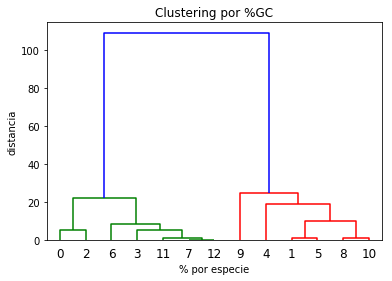

In [247]:
#Dendograma de la relación %GC

import numpy as np      
import matplotlib.pyplot as plt
import pandas as pd

#Dar la base de datos luego de hacer en un archivo a parte en Excel separado por comas (.csv)

dataset = pd.read_csv('GC.csv')
X = dataset.iloc[:, [1]].values

#importo y configuro los valores del dendograma

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Clustering por %GC')
plt.xlabel('% por especie')
plt.ylabel('distancia')
plt.show()


2 . 
- B. Otra forma de caracterizar los genomas es estimando la frecuencia con las que aparecen los codones en los genes codificantes. Usando biopython hacer una función que me extraiga los genes codificantes para cada genoma del cloroplasto del archivo .gb, definir una función que me permita estimar la frecuencia de cada uno de los codones usados por la célula. Con las herramientas anteriores y usando funciones accesorias grafique la frecuencia de estos codones versus el codón encontrado para cada una de las especies. Finalmente, responda: ¿Qué especie presenta el codón más inusual? ¿Qué aminoácido es el mas prevalente y menos prevalente?



In [228]:
#Se realiza este código puesto que más adelante vamos a necesitar información relacionada al nombre del organismo (Name).

i=0

while i<=len(mercado)-1:
    print("Name: ",mercado[i].name, ", corresponde a: ",mercado[i].annotations['organism'])
    i=i+1

Name:  MG859922 , corresponde a:  Pisum sativum subsp. elatius
Name:  MH283711 , corresponde a:  Solanum melongena var. insanum
Name:  KX028884 , corresponde a:  Cocos nucifera
Name:  HQ336405 , corresponde a:  Prunus persica
Name:  EU835853 , corresponde a:  Cicer arietinum
Name:  DQ383816 , corresponde a:  Lactuca sativa
Name:  NC_027152 , corresponde a:  Lens culinaris
Name:  MG255765 , corresponde a:  Olea europaea subsp. laperrinei
Name:  DQ231562 , corresponde a:  Solanum tuberosum
Name:  KR336549 , corresponde a:  Ananas comosus
Name:  MF805727 , corresponde a:  Chenopodium quinoa
Name:  KR233156 , corresponde a:  Brassica oleracea var. capitata
Name:  KP117024 , corresponde a:  Solanum lycopersicum
Name:  EU117376 , corresponde a:  Manihot esculenta


In [223]:
from Bio import SeqIO
from Bio.Alphabet import generic_alphabet
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC

especie1CDS_seq = Seq("", IUPAC.unambiguous_dna)
especie1CDS_seq.alphabet= generic_alphabet

especie2CDS_seq = Seq("", IUPAC.unambiguous_dna)
especie2CDS_seq.alphabet= generic_alphabet

especie3CDS_seq = Seq("", IUPAC.unambiguous_dna)
especie3CDS_seq.alphabet= generic_alphabet

especie4CDS_seq = Seq("", IUPAC.unambiguous_dna)
especie4CDS_seq.alphabet= generic_alphabet

especie5CDS_seq = Seq("", IUPAC.unambiguous_dna)
especie5CDS_seq.alphabet= generic_alphabet

especie6CDS_seq = Seq("", IUPAC.unambiguous_dna)
especie6CDS_seq.alphabet= generic_alphabet

especie7CDS_seq = Seq("", IUPAC.unambiguous_dna)
especie7CDS_seq.alphabet= generic_alphabet

especie8CDS_seq = Seq("", IUPAC.unambiguous_dna)
especie8CDS_seq.alphabet= generic_alphabet

especie9CDS_seq = Seq("", IUPAC.unambiguous_dna)
especie9CDS_seq.alphabet= generic_alphabet

especie10CDS_seq = Seq("", IUPAC.unambiguous_dna)
especie10CDS_seq.alphabet= generic_alphabet

especie11CDS_seq = Seq("", IUPAC.unambiguous_dna)
especie11CDS_seq.alphabet= generic_alphabet

especie12CDS_seq = Seq("", IUPAC.unambiguous_dna)
especie12CDS_seq.alphabet= generic_alphabet

especie13CDS_seq = Seq("", IUPAC.unambiguous_dna)
especie13CDS_seq.alphabet= generic_alphabet

especie14CDS_seq = Seq("", IUPAC.unambiguous_dna)
especie14CDS_seq.alphabet= generic_alphabet


for rec in SeqIO.parse("Mercado.gb", "genbank"):
    if rec.features:
        if rec.name==mercado[0].name:
            for feature in rec.features:
                if feature.type == "CDS":
                    #print (feature.location)
                    #print (feature.qualifiers["protein_id"])
                    #print (rec.name)
                    #print (feature.location.extract(rec).seq)
                    especie1CDS_seq=especie1CDS_seq+feature.location.extract(rec).seq

#print(especie1CDS_seq)

        if rec.name==mercado[1].name:
            for feature in rec.features:
                if feature.type == "CDS":
                    especie2CDS_seq=especie2CDS_seq+feature.location.extract(rec).seq

#print(especie2CDS_seq)

        if rec.name==mercado[2].name:
            for feature in rec.features:
                if feature.type == "CDS":
                    especie3CDS_seq=especie3CDS_seq+feature.location.extract(rec).seq

#print(especie3CDS_seq)

        if rec.name==mercado[3].name:
            for feature in rec.features:
                if feature.type == "CDS":
                    especie4CDS_seq=especie4CDS_seq+feature.location.extract(rec).seq

#print(especie4CDS_seq)

        if rec.name==mercado[4].name:
            for feature in rec.features:
                if feature.type == "CDS":
                    especie5CDS_seq=especie5CDS_seq+feature.location.extract(rec).seq

#print(especie5CDS_seq)

        if rec.name==mercado[5].name:
            for feature in rec.features:
                if feature.type == "CDS":
                    especie6CDS_seq=especie6CDS_seq+feature.location.extract(rec).seq

#print(especie6CDS_seq)

        if rec.name==mercado[6].name:
            for feature in rec.features:
                if feature.type == "CDS":
                    especie7CDS_seq=especie7CDS_seq+feature.location.extract(rec).seq

#print(especie7CDS_seq)

        if rec.name==mercado[7].name:
            for feature in rec.features:
                if feature.type == "CDS":
                    especie8CDS_seq=especie8CDS_seq+feature.location.extract(rec).seq

#print(especie8CDS_seq)

        if rec.name==mercado[8].name:
            for feature in rec.features:
                if feature.type == "CDS":
                    especie9CDS_seq=especie9CDS_seq+feature.location.extract(rec).seq

#print(especie9CDS_seq)

        if rec.name==mercado[9].name:
            for feature in rec.features:
                if feature.type == "CDS":
                    especie10CDS_seq=especie10CDS_seq+feature.location.extract(rec).seq

#print(especie10CDS_seq)

        if rec.name==mercado[10].name:
            for feature in rec.features:
                if feature.type == "CDS":
                    especie11CDS_seq=especie11CDS_seq+feature.location.extract(rec).seq

#print(especie11CDS_seq)

        if rec.name==mercado[11].name:
            for feature in rec.features:
                if feature.type == "CDS":
                    especie12CDS_seq=especie12CDS_seq+feature.location.extract(rec).seq

#print(especie12CDS_seq)

        if rec.name==mercado[12].name:
            for feature in rec.features:
                if feature.type == "CDS":
                    especie13CDS_seq=especie13CDS_seq+feature.location.extract(rec).seq

#print(especie13CDS_seq)

        if rec.name==mercado[13].name:
            for feature in rec.features:
                if feature.type == "CDS":
                    especie14CDS_seq=especie14CDS_seq+feature.location.extract(rec).seq

#print(especie14CDS_seq)
#Lo que se pretende con el código anterior es concatenar para obtener las secuencias codificantes completas para cada organismo


In [244]:
#Como ya tenemos la secuencia codificante para cada organismo, se decide trabajar en otro box por facilidad.
# Se recomienda PACIENCIA, el código se demora 4:40 en correr, PERO FUNCIONA! Jajajaja

#print(len(especie1CDS_seq))
ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(especie1CDS_seq)-1:
    if especie1CDS_seq[ini:fin]=="TTT":
        nTTT=nTTT+1
    if especie1CDS_seq[ini:fin]=="TTC":
        nTTC=nTTC+1
    if especie1CDS_seq[ini:fin]=="TTA":
        nTTA=nTTA+1
    if especie1CDS_seq[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if especie1CDS_seq[ini:fin]=="CTT":
        nCTT=nCTT+1
    if especie1CDS_seq[ini:fin]=="CTC":
        nCTC=nCTC+1
    if especie1CDS_seq[ini:fin]=="CTA":
        nCTA=nCTA+1
    if especie1CDS_seq[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if especie1CDS_seq[ini:fin]=="ATT":
        nATT=nATT+1
    if especie1CDS_seq[ini:fin]=="ATC":
        nATC=nATC+1
    if especie1CDS_seq[ini:fin]=="ATA":
        nATA=nATA+1
    if especie1CDS_seq[ini:fin]=="ATG":
        nATG=nATG+1

    if especie1CDS_seq[ini:fin]=="GTT":
        nGTT=nGTT+1
    if especie1CDS_seq[ini:fin]=="GTC":
        nGTC=nGTC+1
    if especie1CDS_seq[ini:fin]=="GTA":
        nGTA=nGTA+1
    if especie1CDS_seq[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if especie1CDS_seq[ini:fin]=="TCT":
        nTCT=nTCT+1
    if especie1CDS_seq[ini:fin]=="TCC":
        nTCC=nTCC+1
    if especie1CDS_seq[ini:fin]=="TCA":
        nTCA=nTCA+1
    if especie1CDS_seq[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if especie1CDS_seq[ini:fin]=="CCT":
        nCCT=nCCT+1
    if especie1CDS_seq[ini:fin]=="CCC":
        nCCC=nCCC+1
    if especie1CDS_seq[ini:fin]=="CCA":
        nCCA=nCCA+1
    if especie1CDS_seq[ini:fin]=="CCG":
        nCCG=nCCG+1

    if especie1CDS_seq[ini:fin]=="ACT":
        nACT=nACT+1
    if especie1CDS_seq[ini:fin]=="ACC":
        nACC=nACC+1
    if especie1CDS_seq[ini:fin]=="ACA":
        nACA=nACA+1
    if especie1CDS_seq[ini:fin]=="ACG":
        nACG=nACG+1
        
    if especie1CDS_seq[ini:fin]=="GCT":
        nGCT=nGCT+1
    if especie1CDS_seq[ini:fin]=="GCC":
        nGCC=nGCC+1
    if especie1CDS_seq[ini:fin]=="GCA":
        nGCA=nGCA+1
    if especie1CDS_seq[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if especie1CDS_seq[ini:fin]=="TAT":
        nTAT=nTAT+1
    if especie1CDS_seq[ini:fin]=="TAC":
        nTAC=nTAC+1
    if especie1CDS_seq[ini:fin]=="TAA":
        nTAA=nTAA+1
    if especie1CDS_seq[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if especie1CDS_seq[ini:fin]=="CAT":
        nCAT=nCAT+1
    if especie1CDS_seq[ini:fin]=="CAC":
        nCAC=nCAC+1
    if especie1CDS_seq[ini:fin]=="CAA":
        nCAA=nCAA+1
    if especie1CDS_seq[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if especie1CDS_seq[ini:fin]=="AAT":
        nAAT=nAAT+1
    if especie1CDS_seq[ini:fin]=="AAC":
        nAAC=nAAC+1
    if especie1CDS_seq[ini:fin]=="AAA":
        nAAA=nAAA+1
    if especie1CDS_seq[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if especie1CDS_seq[ini:fin]=="GAT":
        nGAT=nGAT+1
    if especie1CDS_seq[ini:fin]=="GAC":
        nGAC=nGAC+1
    if especie1CDS_seq[ini:fin]=="GAA":
        nGAA=nGAA+1
    if especie1CDS_seq[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if especie1CDS_seq[ini:fin]=="TGT":
        nTGT=nTGT+1
    if especie1CDS_seq[ini:fin]=="TGC":
        nTGC=nTGC+1
    if especie1CDS_seq[ini:fin]=="TGA":
        nTGA=nTGA+1
    if especie1CDS_seq[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if especie1CDS_seq[ini:fin]=="CGT":
        nCGT=nCGT+1
    if especie1CDS_seq[ini:fin]=="CGC":
        nCGC=nCGC+1
    if especie1CDS_seq[ini:fin]=="CGA":
        nCGA=nCGA+1
    if especie1CDS_seq[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if especie1CDS_seq[ini:fin]=="AGT":
        nAGT=nAGT+1
    if especie1CDS_seq[ini:fin]=="AGC":
        nAGC=nAGC+1
    if especie1CDS_seq[ini:fin]=="AGA":
        nAGA=nAGA+1
    if especie1CDS_seq[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if especie1CDS_seq[ini:fin]=="GGT":
        nGGT=nGGT+1
    if especie1CDS_seq[ini:fin]=="GGC":
        nGGC=nGGC+1
    if especie1CDS_seq[ini:fin]=="GGA":
        nGGA=nGGA+1
    if especie1CDS_seq[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
codones_especie1={}
codones_especie1["TTT"] = nTTT; codones_especie1["TTC"] = nTTC; codones_especie1["TTA"] = nTTA; codones_especie1["TTG"] = nTTG
codones_especie1["CTT"] = nCTT; codones_especie1["CTC"] = nCTC; codones_especie1["CTA"] = nCTA; codones_especie1["CTG"] = nCTG
codones_especie1["ATT"] = nATT; codones_especie1["ATC"] = nATC; codones_especie1["ATA"] = nATA; codones_especie1["ATG"] = nATG
codones_especie1["GTT"] = nGTT; codones_especie1["GTC"] = nGTC; codones_especie1["GTA"] = nGTA; codones_especie1["GTG"] = nGTG

codones_especie1["TCT"] = nTCT; codones_especie1["TCC"] = nTCC; codones_especie1["TCA"] = nTCA; codones_especie1["TCG"] = nTCG
codones_especie1["CCT"] = nCCT; codones_especie1["CCC"] = nCCC; codones_especie1["CCA"] = nCCA; codones_especie1["CCG"] = nCCG
codones_especie1["ACT"] = nACT; codones_especie1["ACC"] = nACC; codones_especie1["ACA"] = nACA; codones_especie1["ACG"] = nACG
codones_especie1["GCT"] = nGCT; codones_especie1["GCC"] = nGCC; codones_especie1["GCA"] = nGCA; codones_especie1["GCG"] = nGCG

codones_especie1["TAT"] = nTAT; codones_especie1["TAC"] = nTAC; codones_especie1["TAA"] = nTAA; codones_especie1["TAG"] = nTAG
codones_especie1["CAT"] = nCAT; codones_especie1["CAC"] = nCAC; codones_especie1["CAA"] = nCAA; codones_especie1["CAG"] = nCAG
codones_especie1["AAT"] = nAAT; codones_especie1["AAC"] = nAAC; codones_especie1["AAA"] = nAAA; codones_especie1["AAG"] = nAAG
codones_especie1["GAT"] = nGAT; codones_especie1["GAC"] = nGAC; codones_especie1["GAA"] = nGAA; codones_especie1["GAG"] = nGAG

codones_especie1["TGT"] = nTGT; codones_especie1["TGC"] = nTGC; codones_especie1["TGA"] = nTGA; codones_especie1["TGG"] = nTGG
codones_especie1["CGT"] = nCGT; codones_especie1["CGC"] = nCGC; codones_especie1["CGA"] = nCGA; codones_especie1["CGG"] = nCGG
codones_especie1["AGT"] = nAGT; codones_especie1["AGC"] = nAGC; codones_especie1["AGA"] = nAGA; codones_especie1["AGG"] = nAGG
codones_especie1["GGT"] = nGGT; codones_especie1["GGC"] = nGGC; codones_especie1["GGA"] = nGGA; codones_especie1["GGG"] = nGGG

print(mercado[0].annotations['organism'])
print(codones_especie1)

print()#Salto de línea


#PARA LA ESPECIE #2-----------------------------------------------

ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(especie2CDS_seq)-1:
    if especie2CDS_seq[ini:fin]=="TTT":
        nTTT=nTTT+1
    if especie2CDS_seq[ini:fin]=="TTC":
        nTTC=nTTC+1
    if especie2CDS_seq[ini:fin]=="TTA":
        nTTA=nTTA+1
    if especie2CDS_seq[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if especie2CDS_seq[ini:fin]=="CTT":
        nCTT=nCTT+1
    if especie2CDS_seq[ini:fin]=="CTC":
        nCTC=nCTC+1
    if especie2CDS_seq[ini:fin]=="CTA":
        nCTA=nCTA+1
    if especie2CDS_seq[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if especie2CDS_seq[ini:fin]=="ATT":
        nATT=nATT+1
    if especie2CDS_seq[ini:fin]=="ATC":
        nATC=nATC+1
    if especie2CDS_seq[ini:fin]=="ATA":
        nATA=nATA+1
    if especie2CDS_seq[ini:fin]=="ATG":
        nATG=nATG+1

    if especie2CDS_seq[ini:fin]=="GTT":
        nGTT=nGTT+1
    if especie2CDS_seq[ini:fin]=="GTC":
        nGTC=nGTC+1
    if especie2CDS_seq[ini:fin]=="GTA":
        nGTA=nGTA+1
    if especie2CDS_seq[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if especie2CDS_seq[ini:fin]=="TCT":
        nTCT=nTCT+1
    if especie2CDS_seq[ini:fin]=="TCC":
        nTCC=nTCC+1
    if especie2CDS_seq[ini:fin]=="TCA":
        nTCA=nTCA+1
    if especie2CDS_seq[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if especie2CDS_seq[ini:fin]=="CCT":
        nCCT=nCCT+1
    if especie2CDS_seq[ini:fin]=="CCC":
        nCCC=nCCC+1
    if especie2CDS_seq[ini:fin]=="CCA":
        nCCA=nCCA+1
    if especie2CDS_seq[ini:fin]=="CCG":
        nCCG=nCCG+1

    if especie2CDS_seq[ini:fin]=="ACT":
        nACT=nACT+1
    if especie2CDS_seq[ini:fin]=="ACC":
        nACC=nACC+1
    if especie2CDS_seq[ini:fin]=="ACA":
        nACA=nACA+1
    if especie2CDS_seq[ini:fin]=="ACG":
        nACG=nACG+1
        
    if especie2CDS_seq[ini:fin]=="GCT":
        nGCT=nGCT+1
    if especie2CDS_seq[ini:fin]=="GCC":
        nGCC=nGCC+1
    if especie2CDS_seq[ini:fin]=="GCA":
        nGCA=nGCA+1
    if especie2CDS_seq[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if especie2CDS_seq[ini:fin]=="TAT":
        nTAT=nTAT+1
    if especie2CDS_seq[ini:fin]=="TAC":
        nTAC=nTAC+1
    if especie2CDS_seq[ini:fin]=="TAA":
        nTAA=nTAA+1
    if especie2CDS_seq[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if especie2CDS_seq[ini:fin]=="CAT":
        nCAT=nCAT+1
    if especie2CDS_seq[ini:fin]=="CAC":
        nCAC=nCAC+1
    if especie2CDS_seq[ini:fin]=="CAA":
        nCAA=nCAA+1
    if especie2CDS_seq[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if especie2CDS_seq[ini:fin]=="AAT":
        nAAT=nAAT+1
    if especie2CDS_seq[ini:fin]=="AAC":
        nAAC=nAAC+1
    if especie2CDS_seq[ini:fin]=="AAA":
        nAAA=nAAA+1
    if especie2CDS_seq[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if especie2CDS_seq[ini:fin]=="GAT":
        nGAT=nGAT+1
    if especie2CDS_seq[ini:fin]=="GAC":
        nGAC=nGAC+1
    if especie2CDS_seq[ini:fin]=="GAA":
        nGAA=nGAA+1
    if especie2CDS_seq[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if especie2CDS_seq[ini:fin]=="TGT":
        nTGT=nTGT+1
    if especie2CDS_seq[ini:fin]=="TGC":
        nTGC=nTGC+1
    if especie2CDS_seq[ini:fin]=="TGA":
        nTGA=nTGA+1
    if especie2CDS_seq[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if especie2CDS_seq[ini:fin]=="CGT":
        nCGT=nCGT+1
    if especie2CDS_seq[ini:fin]=="CGC":
        nCGC=nCGC+1
    if especie2CDS_seq[ini:fin]=="CGA":
        nCGA=nCGA+1
    if especie2CDS_seq[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if especie2CDS_seq[ini:fin]=="AGT":
        nAGT=nAGT+1
    if especie2CDS_seq[ini:fin]=="AGC":
        nAGC=nAGC+1
    if especie2CDS_seq[ini:fin]=="AGA":
        nAGA=nAGA+1
    if especie2CDS_seq[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if especie2CDS_seq[ini:fin]=="GGT":
        nGGT=nGGT+1
    if especie2CDS_seq[ini:fin]=="GGC":
        nGGC=nGGC+1
    if especie2CDS_seq[ini:fin]=="GGA":
        nGGA=nGGA+1
    if especie2CDS_seq[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
codones_especie2={}
codones_especie2["TTT"] = nTTT; codones_especie2["TTC"] = nTTC; codones_especie2["TTA"] = nTTA; codones_especie2["TTG"] = nTTG
codones_especie2["CTT"] = nCTT; codones_especie2["CTC"] = nCTC; codones_especie2["CTA"] = nCTA; codones_especie2["CTG"] = nCTG
codones_especie2["ATT"] = nATT; codones_especie2["ATC"] = nATC; codones_especie2["ATA"] = nATA; codones_especie2["ATG"] = nATG
codones_especie2["GTT"] = nGTT; codones_especie2["GTC"] = nGTC; codones_especie2["GTA"] = nGTA; codones_especie2["GTG"] = nGTG

codones_especie2["TCT"] = nTCT; codones_especie2["TCC"] = nTCC; codones_especie2["TCA"] = nTCA; codones_especie2["TCG"] = nTCG
codones_especie2["CCT"] = nCCT; codones_especie2["CCC"] = nCCC; codones_especie2["CCA"] = nCCA; codones_especie2["CCG"] = nCCG
codones_especie2["ACT"] = nACT; codones_especie2["ACC"] = nACC; codones_especie2["ACA"] = nACA; codones_especie2["ACG"] = nACG
codones_especie2["GCT"] = nGCT; codones_especie2["GCC"] = nGCC; codones_especie2["GCA"] = nGCA; codones_especie2["GCG"] = nGCG

codones_especie2["TAT"] = nTAT; codones_especie2["TAC"] = nTAC; codones_especie2["TAA"] = nTAA; codones_especie2["TAG"] = nTAG
codones_especie2["CAT"] = nCAT; codones_especie2["CAC"] = nCAC; codones_especie2["CAA"] = nCAA; codones_especie2["CAG"] = nCAG
codones_especie2["AAT"] = nAAT; codones_especie2["AAC"] = nAAC; codones_especie2["AAA"] = nAAA; codones_especie2["AAG"] = nAAG
codones_especie2["GAT"] = nGAT; codones_especie2["GAC"] = nGAC; codones_especie2["GAA"] = nGAA; codones_especie2["GAG"] = nGAG

codones_especie2["TGT"] = nTGT; codones_especie2["TGC"] = nTGC; codones_especie2["TGA"] = nTGA; codones_especie2["TGG"] = nTGG
codones_especie2["CGT"] = nCGT; codones_especie2["CGC"] = nCGC; codones_especie2["CGA"] = nCGA; codones_especie2["CGG"] = nCGG
codones_especie2["AGT"] = nAGT; codones_especie2["AGC"] = nAGC; codones_especie2["AGA"] = nAGA; codones_especie2["AGG"] = nAGG
codones_especie2["GGT"] = nGGT; codones_especie2["GGC"] = nGGC; codones_especie2["GGA"] = nGGA; codones_especie2["GGG"] = nGGG

print(mercado[1].annotations['organism'])
print(codones_especie2)

print()#Salto de línea

#PARA LA ESPECIE 3 ---------------------------------------------------------


ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(especie3CDS_seq)-1:
    if especie3CDS_seq[ini:fin]=="TTT":
        nTTT=nTTT+1
    if especie3CDS_seq[ini:fin]=="TTC":
        nTTC=nTTC+1
    if especie3CDS_seq[ini:fin]=="TTA":
        nTTA=nTTA+1
    if especie3CDS_seq[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if especie3CDS_seq[ini:fin]=="CTT":
        nCTT=nCTT+1
    if especie3CDS_seq[ini:fin]=="CTC":
        nCTC=nCTC+1
    if especie3CDS_seq[ini:fin]=="CTA":
        nCTA=nCTA+1
    if especie3CDS_seq[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if especie3CDS_seq[ini:fin]=="ATT":
        nATT=nATT+1
    if especie3CDS_seq[ini:fin]=="ATC":
        nATC=nATC+1
    if especie3CDS_seq[ini:fin]=="ATA":
        nATA=nATA+1
    if especie3CDS_seq[ini:fin]=="ATG":
        nATG=nATG+1

    if especie3CDS_seq[ini:fin]=="GTT":
        nGTT=nGTT+1
    if especie3CDS_seq[ini:fin]=="GTC":
        nGTC=nGTC+1
    if especie3CDS_seq[ini:fin]=="GTA":
        nGTA=nGTA+1
    if especie3CDS_seq[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if especie3CDS_seq[ini:fin]=="TCT":
        nTCT=nTCT+1
    if especie3CDS_seq[ini:fin]=="TCC":
        nTCC=nTCC+1
    if especie3CDS_seq[ini:fin]=="TCA":
        nTCA=nTCA+1
    if especie3CDS_seq[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if especie3CDS_seq[ini:fin]=="CCT":
        nCCT=nCCT+1
    if especie3CDS_seq[ini:fin]=="CCC":
        nCCC=nCCC+1
    if especie3CDS_seq[ini:fin]=="CCA":
        nCCA=nCCA+1
    if especie3CDS_seq[ini:fin]=="CCG":
        nCCG=nCCG+1

    if especie3CDS_seq[ini:fin]=="ACT":
        nACT=nACT+1
    if especie3CDS_seq[ini:fin]=="ACC":
        nACC=nACC+1
    if especie3CDS_seq[ini:fin]=="ACA":
        nACA=nACA+1
    if especie3CDS_seq[ini:fin]=="ACG":
        nACG=nACG+1
        
    if especie3CDS_seq[ini:fin]=="GCT":
        nGCT=nGCT+1
    if especie3CDS_seq[ini:fin]=="GCC":
        nGCC=nGCC+1
    if especie3CDS_seq[ini:fin]=="GCA":
        nGCA=nGCA+1
    if especie3CDS_seq[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if especie3CDS_seq[ini:fin]=="TAT":
        nTAT=nTAT+1
    if especie3CDS_seq[ini:fin]=="TAC":
        nTAC=nTAC+1
    if especie3CDS_seq[ini:fin]=="TAA":
        nTAA=nTAA+1
    if especie3CDS_seq[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if especie3CDS_seq[ini:fin]=="CAT":
        nCAT=nCAT+1
    if especie3CDS_seq[ini:fin]=="CAC":
        nCAC=nCAC+1
    if especie3CDS_seq[ini:fin]=="CAA":
        nCAA=nCAA+1
    if especie3CDS_seq[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if especie3CDS_seq[ini:fin]=="AAT":
        nAAT=nAAT+1
    if especie3CDS_seq[ini:fin]=="AAC":
        nAAC=nAAC+1
    if especie3CDS_seq[ini:fin]=="AAA":
        nAAA=nAAA+1
    if especie3CDS_seq[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if especie3CDS_seq[ini:fin]=="GAT":
        nGAT=nGAT+1
    if especie3CDS_seq[ini:fin]=="GAC":
        nGAC=nGAC+1
    if especie3CDS_seq[ini:fin]=="GAA":
        nGAA=nGAA+1
    if especie3CDS_seq[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if especie3CDS_seq[ini:fin]=="TGT":
        nTGT=nTGT+1
    if especie3CDS_seq[ini:fin]=="TGC":
        nTGC=nTGC+1
    if especie3CDS_seq[ini:fin]=="TGA":
        nTGA=nTGA+1
    if especie3CDS_seq[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if especie3CDS_seq[ini:fin]=="CGT":
        nCGT=nCGT+1
    if especie3CDS_seq[ini:fin]=="CGC":
        nCGC=nCGC+1
    if especie3CDS_seq[ini:fin]=="CGA":
        nCGA=nCGA+1
    if especie3CDS_seq[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if especie3CDS_seq[ini:fin]=="AGT":
        nAGT=nAGT+1
    if especie3CDS_seq[ini:fin]=="AGC":
        nAGC=nAGC+1
    if especie3CDS_seq[ini:fin]=="AGA":
        nAGA=nAGA+1
    if especie3CDS_seq[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if especie3CDS_seq[ini:fin]=="GGT":
        nGGT=nGGT+1
    if especie3CDS_seq[ini:fin]=="GGC":
        nGGC=nGGC+1
    if especie3CDS_seq[ini:fin]=="GGA":
        nGGA=nGGA+1
    if especie3CDS_seq[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
codones_especie3={}
codones_especie3["TTT"] = nTTT; codones_especie3["TTC"] = nTTC; codones_especie3["TTA"] = nTTA; codones_especie3["TTG"] = nTTG
codones_especie3["CTT"] = nCTT; codones_especie3["CTC"] = nCTC; codones_especie3["CTA"] = nCTA; codones_especie3["CTG"] = nCTG
codones_especie3["ATT"] = nATT; codones_especie3["ATC"] = nATC; codones_especie3["ATA"] = nATA; codones_especie3["ATG"] = nATG
codones_especie3["GTT"] = nGTT; codones_especie3["GTC"] = nGTC; codones_especie3["GTA"] = nGTA; codones_especie3["GTG"] = nGTG

codones_especie3["TCT"] = nTCT; codones_especie3["TCC"] = nTCC; codones_especie3["TCA"] = nTCA; codones_especie3["TCG"] = nTCG
codones_especie3["CCT"] = nCCT; codones_especie3["CCC"] = nCCC; codones_especie3["CCA"] = nCCA; codones_especie3["CCG"] = nCCG
codones_especie3["ACT"] = nACT; codones_especie3["ACC"] = nACC; codones_especie3["ACA"] = nACA; codones_especie3["ACG"] = nACG
codones_especie3["GCT"] = nGCT; codones_especie3["GCC"] = nGCC; codones_especie3["GCA"] = nGCA; codones_especie3["GCG"] = nGCG

codones_especie3["TAT"] = nTAT; codones_especie3["TAC"] = nTAC; codones_especie3["TAA"] = nTAA; codones_especie3["TAG"] = nTAG
codones_especie3["CAT"] = nCAT; codones_especie3["CAC"] = nCAC; codones_especie3["CAA"] = nCAA; codones_especie3["CAG"] = nCAG
codones_especie3["AAT"] = nAAT; codones_especie3["AAC"] = nAAC; codones_especie3["AAA"] = nAAA; codones_especie3["AAG"] = nAAG
codones_especie3["GAT"] = nGAT; codones_especie3["GAC"] = nGAC; codones_especie3["GAA"] = nGAA; codones_especie3["GAG"] = nGAG

codones_especie3["TGT"] = nTGT; codones_especie3["TGC"] = nTGC; codones_especie3["TGA"] = nTGA; codones_especie3["TGG"] = nTGG
codones_especie3["CGT"] = nCGT; codones_especie3["CGC"] = nCGC; codones_especie3["CGA"] = nCGA; codones_especie3["CGG"] = nCGG
codones_especie3["AGT"] = nAGT; codones_especie3["AGC"] = nAGC; codones_especie3["AGA"] = nAGA; codones_especie3["AGG"] = nAGG
codones_especie3["GGT"] = nGGT; codones_especie3["GGC"] = nGGC; codones_especie3["GGA"] = nGGA; codones_especie3["GGG"] = nGGG


print(mercado[2].annotations['organism'])
print(codones_especie3)

print()#Salto de línea

#PARA LA ESPECIE 4------------------------------------------------

ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(especie4CDS_seq)-1:
    if especie4CDS_seq[ini:fin]=="TTT":
        nTTT=nTTT+1
    if especie4CDS_seq[ini:fin]=="TTC":
        nTTC=nTTC+1
    if especie4CDS_seq[ini:fin]=="TTA":
        nTTA=nTTA+1
    if especie4CDS_seq[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if especie4CDS_seq[ini:fin]=="CTT":
        nCTT=nCTT+1
    if especie4CDS_seq[ini:fin]=="CTC":
        nCTC=nCTC+1
    if especie4CDS_seq[ini:fin]=="CTA":
        nCTA=nCTA+1
    if especie4CDS_seq[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if especie4CDS_seq[ini:fin]=="ATT":
        nATT=nATT+1
    if especie4CDS_seq[ini:fin]=="ATC":
        nATC=nATC+1
    if especie4CDS_seq[ini:fin]=="ATA":
        nATA=nATA+1
    if especie4CDS_seq[ini:fin]=="ATG":
        nATG=nATG+1

    if especie4CDS_seq[ini:fin]=="GTT":
        nGTT=nGTT+1
    if especie4CDS_seq[ini:fin]=="GTC":
        nGTC=nGTC+1
    if especie4CDS_seq[ini:fin]=="GTA":
        nGTA=nGTA+1
    if especie4CDS_seq[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if especie4CDS_seq[ini:fin]=="TCT":
        nTCT=nTCT+1
    if especie4CDS_seq[ini:fin]=="TCC":
        nTCC=nTCC+1
    if especie4CDS_seq[ini:fin]=="TCA":
        nTCA=nTCA+1
    if especie4CDS_seq[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if especie4CDS_seq[ini:fin]=="CCT":
        nCCT=nCCT+1
    if especie4CDS_seq[ini:fin]=="CCC":
        nCCC=nCCC+1
    if especie4CDS_seq[ini:fin]=="CCA":
        nCCA=nCCA+1
    if especie4CDS_seq[ini:fin]=="CCG":
        nCCG=nCCG+1

    if especie4CDS_seq[ini:fin]=="ACT":
        nACT=nACT+1
    if especie4CDS_seq[ini:fin]=="ACC":
        nACC=nACC+1
    if especie4CDS_seq[ini:fin]=="ACA":
        nACA=nACA+1
    if especie4CDS_seq[ini:fin]=="ACG":
        nACG=nACG+1
        
    if especie4CDS_seq[ini:fin]=="GCT":
        nGCT=nGCT+1
    if especie4CDS_seq[ini:fin]=="GCC":
        nGCC=nGCC+1
    if especie4CDS_seq[ini:fin]=="GCA":
        nGCA=nGCA+1
    if especie4CDS_seq[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if especie4CDS_seq[ini:fin]=="TAT":
        nTAT=nTAT+1
    if especie4CDS_seq[ini:fin]=="TAC":
        nTAC=nTAC+1
    if especie4CDS_seq[ini:fin]=="TAA":
        nTAA=nTAA+1
    if especie4CDS_seq[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if especie4CDS_seq[ini:fin]=="CAT":
        nCAT=nCAT+1
    if especie4CDS_seq[ini:fin]=="CAC":
        nCAC=nCAC+1
    if especie4CDS_seq[ini:fin]=="CAA":
        nCAA=nCAA+1
    if especie4CDS_seq[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if especie4CDS_seq[ini:fin]=="AAT":
        nAAT=nAAT+1
    if especie4CDS_seq[ini:fin]=="AAC":
        nAAC=nAAC+1
    if especie4CDS_seq[ini:fin]=="AAA":
        nAAA=nAAA+1
    if especie4CDS_seq[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if especie4CDS_seq[ini:fin]=="GAT":
        nGAT=nGAT+1
    if especie4CDS_seq[ini:fin]=="GAC":
        nGAC=nGAC+1
    if especie4CDS_seq[ini:fin]=="GAA":
        nGAA=nGAA+1
    if especie4CDS_seq[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if especie4CDS_seq[ini:fin]=="TGT":
        nTGT=nTGT+1
    if especie4CDS_seq[ini:fin]=="TGC":
        nTGC=nTGC+1
    if especie4CDS_seq[ini:fin]=="TGA":
        nTGA=nTGA+1
    if especie4CDS_seq[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if especie4CDS_seq[ini:fin]=="CGT":
        nCGT=nCGT+1
    if especie4CDS_seq[ini:fin]=="CGC":
        nCGC=nCGC+1
    if especie4CDS_seq[ini:fin]=="CGA":
        nCGA=nCGA+1
    if especie4CDS_seq[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if especie4CDS_seq[ini:fin]=="AGT":
        nAGT=nAGT+1
    if especie4CDS_seq[ini:fin]=="AGC":
        nAGC=nAGC+1
    if especie4CDS_seq[ini:fin]=="AGA":
        nAGA=nAGA+1
    if especie4CDS_seq[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if especie4CDS_seq[ini:fin]=="GGT":
        nGGT=nGGT+1
    if especie4CDS_seq[ini:fin]=="GGC":
        nGGC=nGGC+1
    if especie4CDS_seq[ini:fin]=="GGA":
        nGGA=nGGA+1
    if especie4CDS_seq[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
codones_especie4={}
codones_especie4["TTT"] = nTTT; codones_especie4["TTC"] = nTTC; codones_especie4["TTA"] = nTTA; codones_especie4["TTG"] = nTTG
codones_especie4["CTT"] = nCTT; codones_especie4["CTC"] = nCTC; codones_especie4["CTA"] = nCTA; codones_especie4["CTG"] = nCTG
codones_especie4["ATT"] = nATT; codones_especie4["ATC"] = nATC; codones_especie4["ATA"] = nATA; codones_especie4["ATG"] = nATG
codones_especie4["GTT"] = nGTT; codones_especie4["GTC"] = nGTC; codones_especie4["GTA"] = nGTA; codones_especie4["GTG"] = nGTG

codones_especie4["TCT"] = nTCT; codones_especie4["TCC"] = nTCC; codones_especie4["TCA"] = nTCA; codones_especie4["TCG"] = nTCG
codones_especie4["CCT"] = nCCT; codones_especie4["CCC"] = nCCC; codones_especie4["CCA"] = nCCA; codones_especie4["CCG"] = nCCG
codones_especie4["ACT"] = nACT; codones_especie4["ACC"] = nACC; codones_especie4["ACA"] = nACA; codones_especie4["ACG"] = nACG
codones_especie4["GCT"] = nGCT; codones_especie4["GCC"] = nGCC; codones_especie4["GCA"] = nGCA; codones_especie4["GCG"] = nGCG

codones_especie4["TAT"] = nTAT; codones_especie4["TAC"] = nTAC; codones_especie4["TAA"] = nTAA; codones_especie4["TAG"] = nTAG
codones_especie4["CAT"] = nCAT; codones_especie4["CAC"] = nCAC; codones_especie4["CAA"] = nCAA; codones_especie4["CAG"] = nCAG
codones_especie4["AAT"] = nAAT; codones_especie4["AAC"] = nAAC; codones_especie4["AAA"] = nAAA; codones_especie4["AAG"] = nAAG
codones_especie4["GAT"] = nGAT; codones_especie4["GAC"] = nGAC; codones_especie4["GAA"] = nGAA; codones_especie4["GAG"] = nGAG

codones_especie4["TGT"] = nTGT; codones_especie4["TGC"] = nTGC; codones_especie4["TGA"] = nTGA; codones_especie4["TGG"] = nTGG
codones_especie4["CGT"] = nCGT; codones_especie4["CGC"] = nCGC; codones_especie4["CGA"] = nCGA; codones_especie4["CGG"] = nCGG
codones_especie4["AGT"] = nAGT; codones_especie4["AGC"] = nAGC; codones_especie4["AGA"] = nAGA; codones_especie4["AGG"] = nAGG
codones_especie4["GGT"] = nGGT; codones_especie4["GGC"] = nGGC; codones_especie4["GGA"] = nGGA; codones_especie4["GGG"] = nGGG

print(mercado[3].annotations['organism'])
print(codones_especie4)

print()#Salto de línea

#PARA LA ESPECIE 5-----------------------------------------------

ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(especie5CDS_seq)-1:
    if especie5CDS_seq[ini:fin]=="TTT":
        nTTT=nTTT+1
    if especie5CDS_seq[ini:fin]=="TTC":
        nTTC=nTTC+1
    if especie5CDS_seq[ini:fin]=="TTA":
        nTTA=nTTA+1
    if especie5CDS_seq[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if especie5CDS_seq[ini:fin]=="CTT":
        nCTT=nCTT+1
    if especie5CDS_seq[ini:fin]=="CTC":
        nCTC=nCTC+1
    if especie5CDS_seq[ini:fin]=="CTA":
        nCTA=nCTA+1
    if especie5CDS_seq[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if especie5CDS_seq[ini:fin]=="ATT":
        nATT=nATT+1
    if especie5CDS_seq[ini:fin]=="ATC":
        nATC=nATC+1
    if especie5CDS_seq[ini:fin]=="ATA":
        nATA=nATA+1
    if especie5CDS_seq[ini:fin]=="ATG":
        nATG=nATG+1

    if especie5CDS_seq[ini:fin]=="GTT":
        nGTT=nGTT+1
    if especie5CDS_seq[ini:fin]=="GTC":
        nGTC=nGTC+1
    if especie5CDS_seq[ini:fin]=="GTA":
        nGTA=nGTA+1
    if especie5CDS_seq[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if especie5CDS_seq[ini:fin]=="TCT":
        nTCT=nTCT+1
    if especie5CDS_seq[ini:fin]=="TCC":
        nTCC=nTCC+1
    if especie5CDS_seq[ini:fin]=="TCA":
        nTCA=nTCA+1
    if especie5CDS_seq[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if especie5CDS_seq[ini:fin]=="CCT":
        nCCT=nCCT+1
    if especie5CDS_seq[ini:fin]=="CCC":
        nCCC=nCCC+1
    if especie5CDS_seq[ini:fin]=="CCA":
        nCCA=nCCA+1
    if especie5CDS_seq[ini:fin]=="CCG":
        nCCG=nCCG+1

    if especie5CDS_seq[ini:fin]=="ACT":
        nACT=nACT+1
    if especie5CDS_seq[ini:fin]=="ACC":
        nACC=nACC+1
    if especie5CDS_seq[ini:fin]=="ACA":
        nACA=nACA+1
    if especie5CDS_seq[ini:fin]=="ACG":
        nACG=nACG+1
        
    if especie5CDS_seq[ini:fin]=="GCT":
        nGCT=nGCT+1
    if especie5CDS_seq[ini:fin]=="GCC":
        nGCC=nGCC+1
    if especie5CDS_seq[ini:fin]=="GCA":
        nGCA=nGCA+1
    if especie5CDS_seq[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if especie5CDS_seq[ini:fin]=="TAT":
        nTAT=nTAT+1
    if especie5CDS_seq[ini:fin]=="TAC":
        nTAC=nTAC+1
    if especie5CDS_seq[ini:fin]=="TAA":
        nTAA=nTAA+1
    if especie5CDS_seq[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if especie5CDS_seq[ini:fin]=="CAT":
        nCAT=nCAT+1
    if especie5CDS_seq[ini:fin]=="CAC":
        nCAC=nCAC+1
    if especie5CDS_seq[ini:fin]=="CAA":
        nCAA=nCAA+1
    if especie5CDS_seq[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if especie5CDS_seq[ini:fin]=="AAT":
        nAAT=nAAT+1
    if especie5CDS_seq[ini:fin]=="AAC":
        nAAC=nAAC+1
    if especie5CDS_seq[ini:fin]=="AAA":
        nAAA=nAAA+1
    if especie5CDS_seq[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if especie5CDS_seq[ini:fin]=="GAT":
        nGAT=nGAT+1
    if especie5CDS_seq[ini:fin]=="GAC":
        nGAC=nGAC+1
    if especie5CDS_seq[ini:fin]=="GAA":
        nGAA=nGAA+1
    if especie5CDS_seq[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if especie5CDS_seq[ini:fin]=="TGT":
        nTGT=nTGT+1
    if especie5CDS_seq[ini:fin]=="TGC":
        nTGC=nTGC+1
    if especie5CDS_seq[ini:fin]=="TGA":
        nTGA=nTGA+1
    if especie5CDS_seq[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if especie5CDS_seq[ini:fin]=="CGT":
        nCGT=nCGT+1
    if especie5CDS_seq[ini:fin]=="CGC":
        nCGC=nCGC+1
    if especie5CDS_seq[ini:fin]=="CGA":
        nCGA=nCGA+1
    if especie5CDS_seq[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if especie5CDS_seq[ini:fin]=="AGT":
        nAGT=nAGT+1
    if especie5CDS_seq[ini:fin]=="AGC":
        nAGC=nAGC+1
    if especie5CDS_seq[ini:fin]=="AGA":
        nAGA=nAGA+1
    if especie5CDS_seq[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if especie5CDS_seq[ini:fin]=="GGT":
        nGGT=nGGT+1
    if especie5CDS_seq[ini:fin]=="GGC":
        nGGC=nGGC+1
    if especie5CDS_seq[ini:fin]=="GGA":
        nGGA=nGGA+1
    if especie5CDS_seq[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
codones_especie5={}
codones_especie5["TTT"] = nTTT; codones_especie5["TTC"] = nTTC; codones_especie5["TTA"] = nTTA; codones_especie5["TTG"] = nTTG
codones_especie5["CTT"] = nCTT; codones_especie5["CTC"] = nCTC; codones_especie5["CTA"] = nCTA; codones_especie5["CTG"] = nCTG
codones_especie5["ATT"] = nATT; codones_especie5["ATC"] = nATC; codones_especie5["ATA"] = nATA; codones_especie5["ATG"] = nATG
codones_especie5["GTT"] = nGTT; codones_especie5["GTC"] = nGTC; codones_especie5["GTA"] = nGTA; codones_especie5["GTG"] = nGTG

codones_especie5["TCT"] = nTCT; codones_especie5["TCC"] = nTCC; codones_especie5["TCA"] = nTCA; codones_especie5["TCG"] = nTCG
codones_especie5["CCT"] = nCCT; codones_especie5["CCC"] = nCCC; codones_especie5["CCA"] = nCCA; codones_especie5["CCG"] = nCCG
codones_especie5["ACT"] = nACT; codones_especie5["ACC"] = nACC; codones_especie5["ACA"] = nACA; codones_especie5["ACG"] = nACG
codones_especie5["GCT"] = nGCT; codones_especie5["GCC"] = nGCC; codones_especie5["GCA"] = nGCA; codones_especie5["GCG"] = nGCG

codones_especie5["TAT"] = nTAT; codones_especie5["TAC"] = nTAC; codones_especie5["TAA"] = nTAA; codones_especie5["TAG"] = nTAG
codones_especie5["CAT"] = nCAT; codones_especie5["CAC"] = nCAC; codones_especie5["CAA"] = nCAA; codones_especie5["CAG"] = nCAG
codones_especie5["AAT"] = nAAT; codones_especie5["AAC"] = nAAC; codones_especie5["AAA"] = nAAA; codones_especie5["AAG"] = nAAG
codones_especie5["GAT"] = nGAT; codones_especie5["GAC"] = nGAC; codones_especie5["GAA"] = nGAA; codones_especie5["GAG"] = nGAG

codones_especie5["TGT"] = nTGT; codones_especie5["TGC"] = nTGC; codones_especie5["TGA"] = nTGA; codones_especie5["TGG"] = nTGG
codones_especie5["CGT"] = nCGT; codones_especie5["CGC"] = nCGC; codones_especie5["CGA"] = nCGA; codones_especie5["CGG"] = nCGG
codones_especie5["AGT"] = nAGT; codones_especie5["AGC"] = nAGC; codones_especie5["AGA"] = nAGA; codones_especie5["AGG"] = nAGG
codones_especie5["GGT"] = nGGT; codones_especie5["GGC"] = nGGC; codones_especie5["GGA"] = nGGA; codones_especie5["GGG"] = nGGG

print(mercado[4].annotations['organism'])
print(codones_especie5)

print()#Salto de línea

#PARA LA ESPECIE 6----------------------------------------


ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(especie6CDS_seq)-1:
    if especie6CDS_seq[ini:fin]=="TTT":
        nTTT=nTTT+1
    if especie6CDS_seq[ini:fin]=="TTC":
        nTTC=nTTC+1
    if especie6CDS_seq[ini:fin]=="TTA":
        nTTA=nTTA+1
    if especie6CDS_seq[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if especie6CDS_seq[ini:fin]=="CTT":
        nCTT=nCTT+1
    if especie6CDS_seq[ini:fin]=="CTC":
        nCTC=nCTC+1
    if especie6CDS_seq[ini:fin]=="CTA":
        nCTA=nCTA+1
    if especie6CDS_seq[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if especie6CDS_seq[ini:fin]=="ATT":
        nATT=nATT+1
    if especie6CDS_seq[ini:fin]=="ATC":
        nATC=nATC+1
    if especie6CDS_seq[ini:fin]=="ATA":
        nATA=nATA+1
    if especie6CDS_seq[ini:fin]=="ATG":
        nATG=nATG+1

    if especie6CDS_seq[ini:fin]=="GTT":
        nGTT=nGTT+1
    if especie6CDS_seq[ini:fin]=="GTC":
        nGTC=nGTC+1
    if especie6CDS_seq[ini:fin]=="GTA":
        nGTA=nGTA+1
    if especie6CDS_seq[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if especie6CDS_seq[ini:fin]=="TCT":
        nTCT=nTCT+1
    if especie6CDS_seq[ini:fin]=="TCC":
        nTCC=nTCC+1
    if especie6CDS_seq[ini:fin]=="TCA":
        nTCA=nTCA+1
    if especie6CDS_seq[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if especie6CDS_seq[ini:fin]=="CCT":
        nCCT=nCCT+1
    if especie6CDS_seq[ini:fin]=="CCC":
        nCCC=nCCC+1
    if especie6CDS_seq[ini:fin]=="CCA":
        nCCA=nCCA+1
    if especie6CDS_seq[ini:fin]=="CCG":
        nCCG=nCCG+1

    if especie6CDS_seq[ini:fin]=="ACT":
        nACT=nACT+1
    if especie6CDS_seq[ini:fin]=="ACC":
        nACC=nACC+1
    if especie6CDS_seq[ini:fin]=="ACA":
        nACA=nACA+1
    if especie6CDS_seq[ini:fin]=="ACG":
        nACG=nACG+1
        
    if especie6CDS_seq[ini:fin]=="GCT":
        nGCT=nGCT+1
    if especie6CDS_seq[ini:fin]=="GCC":
        nGCC=nGCC+1
    if especie6CDS_seq[ini:fin]=="GCA":
        nGCA=nGCA+1
    if especie6CDS_seq[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if especie6CDS_seq[ini:fin]=="TAT":
        nTAT=nTAT+1
    if especie6CDS_seq[ini:fin]=="TAC":
        nTAC=nTAC+1
    if especie6CDS_seq[ini:fin]=="TAA":
        nTAA=nTAA+1
    if especie6CDS_seq[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if especie6CDS_seq[ini:fin]=="CAT":
        nCAT=nCAT+1
    if especie6CDS_seq[ini:fin]=="CAC":
        nCAC=nCAC+1
    if especie6CDS_seq[ini:fin]=="CAA":
        nCAA=nCAA+1
    if especie6CDS_seq[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if especie6CDS_seq[ini:fin]=="AAT":
        nAAT=nAAT+1
    if especie6CDS_seq[ini:fin]=="AAC":
        nAAC=nAAC+1
    if especie6CDS_seq[ini:fin]=="AAA":
        nAAA=nAAA+1
    if especie6CDS_seq[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if especie6CDS_seq[ini:fin]=="GAT":
        nGAT=nGAT+1
    if especie6CDS_seq[ini:fin]=="GAC":
        nGAC=nGAC+1
    if especie6CDS_seq[ini:fin]=="GAA":
        nGAA=nGAA+1
    if especie6CDS_seq[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if especie6CDS_seq[ini:fin]=="TGT":
        nTGT=nTGT+1
    if especie6CDS_seq[ini:fin]=="TGC":
        nTGC=nTGC+1
    if especie6CDS_seq[ini:fin]=="TGA":
        nTGA=nTGA+1
    if especie6CDS_seq[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if especie6CDS_seq[ini:fin]=="CGT":
        nCGT=nCGT+1
    if especie6CDS_seq[ini:fin]=="CGC":
        nCGC=nCGC+1
    if especie6CDS_seq[ini:fin]=="CGA":
        nCGA=nCGA+1
    if especie6CDS_seq[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if especie6CDS_seq[ini:fin]=="AGT":
        nAGT=nAGT+1
    if especie6CDS_seq[ini:fin]=="AGC":
        nAGC=nAGC+1
    if especie6CDS_seq[ini:fin]=="AGA":
        nAGA=nAGA+1
    if especie6CDS_seq[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if especie6CDS_seq[ini:fin]=="GGT":
        nGGT=nGGT+1
    if especie6CDS_seq[ini:fin]=="GGC":
        nGGC=nGGC+1
    if especie6CDS_seq[ini:fin]=="GGA":
        nGGA=nGGA+1
    if especie6CDS_seq[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
codones_especie6={}
codones_especie6["TTT"] = nTTT; codones_especie6["TTC"] = nTTC; codones_especie6["TTA"] = nTTA; codones_especie6["TTG"] = nTTG
codones_especie6["CTT"] = nCTT; codones_especie6["CTC"] = nCTC; codones_especie6["CTA"] = nCTA; codones_especie6["CTG"] = nCTG
codones_especie6["ATT"] = nATT; codones_especie6["ATC"] = nATC; codones_especie6["ATA"] = nATA; codones_especie6["ATG"] = nATG
codones_especie6["GTT"] = nGTT; codones_especie6["GTC"] = nGTC; codones_especie6["GTA"] = nGTA; codones_especie6["GTG"] = nGTG

codones_especie6["TCT"] = nTCT; codones_especie6["TCC"] = nTCC; codones_especie6["TCA"] = nTCA; codones_especie6["TCG"] = nTCG
codones_especie6["CCT"] = nCCT; codones_especie6["CCC"] = nCCC; codones_especie6["CCA"] = nCCA; codones_especie6["CCG"] = nCCG
codones_especie6["ACT"] = nACT; codones_especie6["ACC"] = nACC; codones_especie6["ACA"] = nACA; codones_especie6["ACG"] = nACG
codones_especie6["GCT"] = nGCT; codones_especie6["GCC"] = nGCC; codones_especie6["GCA"] = nGCA; codones_especie6["GCG"] = nGCG

codones_especie6["TAT"] = nTAT; codones_especie6["TAC"] = nTAC; codones_especie6["TAA"] = nTAA; codones_especie6["TAG"] = nTAG
codones_especie6["CAT"] = nCAT; codones_especie6["CAC"] = nCAC; codones_especie6["CAA"] = nCAA; codones_especie6["CAG"] = nCAG
codones_especie6["AAT"] = nAAT; codones_especie6["AAC"] = nAAC; codones_especie6["AAA"] = nAAA; codones_especie6["AAG"] = nAAG
codones_especie6["GAT"] = nGAT; codones_especie6["GAC"] = nGAC; codones_especie6["GAA"] = nGAA; codones_especie6["GAG"] = nGAG

codones_especie6["TGT"] = nTGT; codones_especie6["TGC"] = nTGC; codones_especie6["TGA"] = nTGA; codones_especie6["TGG"] = nTGG
codones_especie6["CGT"] = nCGT; codones_especie6["CGC"] = nCGC; codones_especie6["CGA"] = nCGA; codones_especie6["CGG"] = nCGG
codones_especie6["AGT"] = nAGT; codones_especie6["AGC"] = nAGC; codones_especie6["AGA"] = nAGA; codones_especie6["AGG"] = nAGG
codones_especie6["GGT"] = nGGT; codones_especie6["GGC"] = nGGC; codones_especie6["GGA"] = nGGA; codones_especie6["GGG"] = nGGG


print(mercado[5].annotations['organism'])
print(codones_especie6)

print()#Salto de línea

#PARA LA ESPECIE 7 -------------------------


ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(especie7CDS_seq)-1:
    if especie7CDS_seq[ini:fin]=="TTT":
        nTTT=nTTT+1
    if especie7CDS_seq[ini:fin]=="TTC":
        nTTC=nTTC+1
    if especie7CDS_seq[ini:fin]=="TTA":
        nTTA=nTTA+1
    if especie7CDS_seq[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if especie7CDS_seq[ini:fin]=="CTT":
        nCTT=nCTT+1
    if especie7CDS_seq[ini:fin]=="CTC":
        nCTC=nCTC+1
    if especie7CDS_seq[ini:fin]=="CTA":
        nCTA=nCTA+1
    if especie7CDS_seq[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if especie7CDS_seq[ini:fin]=="ATT":
        nATT=nATT+1
    if especie7CDS_seq[ini:fin]=="ATC":
        nATC=nATC+1
    if especie7CDS_seq[ini:fin]=="ATA":
        nATA=nATA+1
    if especie7CDS_seq[ini:fin]=="ATG":
        nATG=nATG+1

    if especie7CDS_seq[ini:fin]=="GTT":
        nGTT=nGTT+1
    if especie7CDS_seq[ini:fin]=="GTC":
        nGTC=nGTC+1
    if especie7CDS_seq[ini:fin]=="GTA":
        nGTA=nGTA+1
    if especie7CDS_seq[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if especie7CDS_seq[ini:fin]=="TCT":
        nTCT=nTCT+1
    if especie7CDS_seq[ini:fin]=="TCC":
        nTCC=nTCC+1
    if especie7CDS_seq[ini:fin]=="TCA":
        nTCA=nTCA+1
    if especie7CDS_seq[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if especie7CDS_seq[ini:fin]=="CCT":
        nCCT=nCCT+1
    if especie7CDS_seq[ini:fin]=="CCC":
        nCCC=nCCC+1
    if especie7CDS_seq[ini:fin]=="CCA":
        nCCA=nCCA+1
    if especie7CDS_seq[ini:fin]=="CCG":
        nCCG=nCCG+1

    if especie7CDS_seq[ini:fin]=="ACT":
        nACT=nACT+1
    if especie7CDS_seq[ini:fin]=="ACC":
        nACC=nACC+1
    if especie7CDS_seq[ini:fin]=="ACA":
        nACA=nACA+1
    if especie7CDS_seq[ini:fin]=="ACG":
        nACG=nACG+1
        
    if especie7CDS_seq[ini:fin]=="GCT":
        nGCT=nGCT+1
    if especie7CDS_seq[ini:fin]=="GCC":
        nGCC=nGCC+1
    if especie7CDS_seq[ini:fin]=="GCA":
        nGCA=nGCA+1
    if especie7CDS_seq[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if especie7CDS_seq[ini:fin]=="TAT":
        nTAT=nTAT+1
    if especie7CDS_seq[ini:fin]=="TAC":
        nTAC=nTAC+1
    if especie7CDS_seq[ini:fin]=="TAA":
        nTAA=nTAA+1
    if especie7CDS_seq[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if especie7CDS_seq[ini:fin]=="CAT":
        nCAT=nCAT+1
    if especie7CDS_seq[ini:fin]=="CAC":
        nCAC=nCAC+1
    if especie7CDS_seq[ini:fin]=="CAA":
        nCAA=nCAA+1
    if especie7CDS_seq[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if especie7CDS_seq[ini:fin]=="AAT":
        nAAT=nAAT+1
    if especie7CDS_seq[ini:fin]=="AAC":
        nAAC=nAAC+1
    if especie7CDS_seq[ini:fin]=="AAA":
        nAAA=nAAA+1
    if especie7CDS_seq[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if especie7CDS_seq[ini:fin]=="GAT":
        nGAT=nGAT+1
    if especie7CDS_seq[ini:fin]=="GAC":
        nGAC=nGAC+1
    if especie7CDS_seq[ini:fin]=="GAA":
        nGAA=nGAA+1
    if especie7CDS_seq[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if especie7CDS_seq[ini:fin]=="TGT":
        nTGT=nTGT+1
    if especie7CDS_seq[ini:fin]=="TGC":
        nTGC=nTGC+1
    if especie7CDS_seq[ini:fin]=="TGA":
        nTGA=nTGA+1
    if especie7CDS_seq[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if especie7CDS_seq[ini:fin]=="CGT":
        nCGT=nCGT+1
    if especie7CDS_seq[ini:fin]=="CGC":
        nCGC=nCGC+1
    if especie7CDS_seq[ini:fin]=="CGA":
        nCGA=nCGA+1
    if especie7CDS_seq[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if especie7CDS_seq[ini:fin]=="AGT":
        nAGT=nAGT+1
    if especie7CDS_seq[ini:fin]=="AGC":
        nAGC=nAGC+1
    if especie7CDS_seq[ini:fin]=="AGA":
        nAGA=nAGA+1
    if especie7CDS_seq[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if especie7CDS_seq[ini:fin]=="GGT":
        nGGT=nGGT+1
    if especie7CDS_seq[ini:fin]=="GGC":
        nGGC=nGGC+1
    if especie7CDS_seq[ini:fin]=="GGA":
        nGGA=nGGA+1
    if especie7CDS_seq[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
codones_especie7={}
codones_especie7["TTT"] = nTTT; codones_especie7["TTC"] = nTTC; codones_especie7["TTA"] = nTTA; codones_especie7["TTG"] = nTTG
codones_especie7["CTT"] = nCTT; codones_especie7["CTC"] = nCTC; codones_especie7["CTA"] = nCTA; codones_especie7["CTG"] = nCTG
codones_especie7["ATT"] = nATT; codones_especie7["ATC"] = nATC; codones_especie7["ATA"] = nATA; codones_especie7["ATG"] = nATG
codones_especie7["GTT"] = nGTT; codones_especie7["GTC"] = nGTC; codones_especie7["GTA"] = nGTA; codones_especie7["GTG"] = nGTG

codones_especie7["TCT"] = nTCT; codones_especie7["TCC"] = nTCC; codones_especie7["TCA"] = nTCA; codones_especie7["TCG"] = nTCG
codones_especie7["CCT"] = nCCT; codones_especie7["CCC"] = nCCC; codones_especie7["CCA"] = nCCA; codones_especie7["CCG"] = nCCG
codones_especie7["ACT"] = nACT; codones_especie7["ACC"] = nACC; codones_especie7["ACA"] = nACA; codones_especie7["ACG"] = nACG
codones_especie7["GCT"] = nGCT; codones_especie7["GCC"] = nGCC; codones_especie7["GCA"] = nGCA; codones_especie7["GCG"] = nGCG

codones_especie7["TAT"] = nTAT; codones_especie7["TAC"] = nTAC; codones_especie7["TAA"] = nTAA; codones_especie7["TAG"] = nTAG
codones_especie7["CAT"] = nCAT; codones_especie7["CAC"] = nCAC; codones_especie7["CAA"] = nCAA; codones_especie7["CAG"] = nCAG
codones_especie7["AAT"] = nAAT; codones_especie7["AAC"] = nAAC; codones_especie7["AAA"] = nAAA; codones_especie7["AAG"] = nAAG
codones_especie7["GAT"] = nGAT; codones_especie7["GAC"] = nGAC; codones_especie7["GAA"] = nGAA; codones_especie7["GAG"] = nGAG

codones_especie7["TGT"] = nTGT; codones_especie7["TGC"] = nTGC; codones_especie7["TGA"] = nTGA; codones_especie7["TGG"] = nTGG
codones_especie7["CGT"] = nCGT; codones_especie7["CGC"] = nCGC; codones_especie7["CGA"] = nCGA; codones_especie7["CGG"] = nCGG
codones_especie7["AGT"] = nAGT; codones_especie7["AGC"] = nAGC; codones_especie7["AGA"] = nAGA; codones_especie7["AGG"] = nAGG
codones_especie7["GGT"] = nGGT; codones_especie7["GGC"] = nGGC; codones_especie7["GGA"] = nGGA; codones_especie7["GGG"] = nGGG


print(mercado[6].annotations['organism'])
print(codones_especie7)

print()#Salto de línea

#PARA LA ESPECIE 8 ---------------------------------------------------


ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(especie8CDS_seq)-1:
    if especie8CDS_seq[ini:fin]=="TTT":
        nTTT=nTTT+1
    if especie8CDS_seq[ini:fin]=="TTC":
        nTTC=nTTC+1
    if especie8CDS_seq[ini:fin]=="TTA":
        nTTA=nTTA+1
    if especie8CDS_seq[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if especie8CDS_seq[ini:fin]=="CTT":
        nCTT=nCTT+1
    if especie8CDS_seq[ini:fin]=="CTC":
        nCTC=nCTC+1
    if especie8CDS_seq[ini:fin]=="CTA":
        nCTA=nCTA+1
    if especie8CDS_seq[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if especie8CDS_seq[ini:fin]=="ATT":
        nATT=nATT+1
    if especie8CDS_seq[ini:fin]=="ATC":
        nATC=nATC+1
    if especie8CDS_seq[ini:fin]=="ATA":
        nATA=nATA+1
    if especie8CDS_seq[ini:fin]=="ATG":
        nATG=nATG+1

    if especie8CDS_seq[ini:fin]=="GTT":
        nGTT=nGTT+1
    if especie8CDS_seq[ini:fin]=="GTC":
        nGTC=nGTC+1
    if especie8CDS_seq[ini:fin]=="GTA":
        nGTA=nGTA+1
    if especie8CDS_seq[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if especie8CDS_seq[ini:fin]=="TCT":
        nTCT=nTCT+1
    if especie8CDS_seq[ini:fin]=="TCC":
        nTCC=nTCC+1
    if especie8CDS_seq[ini:fin]=="TCA":
        nTCA=nTCA+1
    if especie8CDS_seq[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if especie8CDS_seq[ini:fin]=="CCT":
        nCCT=nCCT+1
    if especie8CDS_seq[ini:fin]=="CCC":
        nCCC=nCCC+1
    if especie8CDS_seq[ini:fin]=="CCA":
        nCCA=nCCA+1
    if especie8CDS_seq[ini:fin]=="CCG":
        nCCG=nCCG+1

    if especie8CDS_seq[ini:fin]=="ACT":
        nACT=nACT+1
    if especie8CDS_seq[ini:fin]=="ACC":
        nACC=nACC+1
    if especie8CDS_seq[ini:fin]=="ACA":
        nACA=nACA+1
    if especie8CDS_seq[ini:fin]=="ACG":
        nACG=nACG+1
        
    if especie8CDS_seq[ini:fin]=="GCT":
        nGCT=nGCT+1
    if especie8CDS_seq[ini:fin]=="GCC":
        nGCC=nGCC+1
    if especie8CDS_seq[ini:fin]=="GCA":
        nGCA=nGCA+1
    if especie8CDS_seq[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if especie8CDS_seq[ini:fin]=="TAT":
        nTAT=nTAT+1
    if especie8CDS_seq[ini:fin]=="TAC":
        nTAC=nTAC+1
    if especie8CDS_seq[ini:fin]=="TAA":
        nTAA=nTAA+1
    if especie8CDS_seq[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if especie8CDS_seq[ini:fin]=="CAT":
        nCAT=nCAT+1
    if especie8CDS_seq[ini:fin]=="CAC":
        nCAC=nCAC+1
    if especie8CDS_seq[ini:fin]=="CAA":
        nCAA=nCAA+1
    if especie8CDS_seq[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if especie8CDS_seq[ini:fin]=="AAT":
        nAAT=nAAT+1
    if especie8CDS_seq[ini:fin]=="AAC":
        nAAC=nAAC+1
    if especie8CDS_seq[ini:fin]=="AAA":
        nAAA=nAAA+1
    if especie8CDS_seq[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if especie8CDS_seq[ini:fin]=="GAT":
        nGAT=nGAT+1
    if especie8CDS_seq[ini:fin]=="GAC":
        nGAC=nGAC+1
    if especie8CDS_seq[ini:fin]=="GAA":
        nGAA=nGAA+1
    if especie8CDS_seq[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if especie8CDS_seq[ini:fin]=="TGT":
        nTGT=nTGT+1
    if especie8CDS_seq[ini:fin]=="TGC":
        nTGC=nTGC+1
    if especie8CDS_seq[ini:fin]=="TGA":
        nTGA=nTGA+1
    if especie8CDS_seq[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if especie8CDS_seq[ini:fin]=="CGT":
        nCGT=nCGT+1
    if especie8CDS_seq[ini:fin]=="CGC":
        nCGC=nCGC+1
    if especie8CDS_seq[ini:fin]=="CGA":
        nCGA=nCGA+1
    if especie8CDS_seq[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if especie8CDS_seq[ini:fin]=="AGT":
        nAGT=nAGT+1
    if especie8CDS_seq[ini:fin]=="AGC":
        nAGC=nAGC+1
    if especie8CDS_seq[ini:fin]=="AGA":
        nAGA=nAGA+1
    if especie8CDS_seq[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if especie8CDS_seq[ini:fin]=="GGT":
        nGGT=nGGT+1
    if especie8CDS_seq[ini:fin]=="GGC":
        nGGC=nGGC+1
    if especie8CDS_seq[ini:fin]=="GGA":
        nGGA=nGGA+1
    if especie8CDS_seq[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
codones_especie8={}
codones_especie8["TTT"] = nTTT; codones_especie8["TTC"] = nTTC; codones_especie8["TTA"] = nTTA; codones_especie8["TTG"] = nTTG
codones_especie8["CTT"] = nCTT; codones_especie8["CTC"] = nCTC; codones_especie8["CTA"] = nCTA; codones_especie8["CTG"] = nCTG
codones_especie8["ATT"] = nATT; codones_especie8["ATC"] = nATC; codones_especie8["ATA"] = nATA; codones_especie8["ATG"] = nATG
codones_especie8["GTT"] = nGTT; codones_especie8["GTC"] = nGTC; codones_especie8["GTA"] = nGTA; codones_especie8["GTG"] = nGTG

codones_especie8["TCT"] = nTCT; codones_especie8["TCC"] = nTCC; codones_especie8["TCA"] = nTCA; codones_especie8["TCG"] = nTCG
codones_especie8["CCT"] = nCCT; codones_especie8["CCC"] = nCCC; codones_especie8["CCA"] = nCCA; codones_especie8["CCG"] = nCCG
codones_especie8["ACT"] = nACT; codones_especie8["ACC"] = nACC; codones_especie8["ACA"] = nACA; codones_especie8["ACG"] = nACG
codones_especie8["GCT"] = nGCT; codones_especie8["GCC"] = nGCC; codones_especie8["GCA"] = nGCA; codones_especie8["GCG"] = nGCG

codones_especie8["TAT"] = nTAT; codones_especie8["TAC"] = nTAC; codones_especie8["TAA"] = nTAA; codones_especie8["TAG"] = nTAG
codones_especie8["CAT"] = nCAT; codones_especie8["CAC"] = nCAC; codones_especie8["CAA"] = nCAA; codones_especie8["CAG"] = nCAG
codones_especie8["AAT"] = nAAT; codones_especie8["AAC"] = nAAC; codones_especie8["AAA"] = nAAA; codones_especie8["AAG"] = nAAG
codones_especie8["GAT"] = nGAT; codones_especie8["GAC"] = nGAC; codones_especie8["GAA"] = nGAA; codones_especie8["GAG"] = nGAG

codones_especie8["TGT"] = nTGT; codones_especie8["TGC"] = nTGC; codones_especie8["TGA"] = nTGA; codones_especie8["TGG"] = nTGG
codones_especie8["CGT"] = nCGT; codones_especie8["CGC"] = nCGC; codones_especie8["CGA"] = nCGA; codones_especie8["CGG"] = nCGG
codones_especie8["AGT"] = nAGT; codones_especie8["AGC"] = nAGC; codones_especie8["AGA"] = nAGA; codones_especie8["AGG"] = nAGG
codones_especie8["GGT"] = nGGT; codones_especie8["GGC"] = nGGC; codones_especie8["GGA"] = nGGA; codones_especie8["GGG"] = nGGG


print(mercado[7].annotations['organism'])
print(codones_especie8)

print()#Salto de línea

#PARA LA ESPECIE 9 ----------------------------------------------

nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(especie9CDS_seq)-1:
    if especie9CDS_seq[ini:fin]=="TTT":
        nTTT=nTTT+1
    if especie9CDS_seq[ini:fin]=="TTC":
        nTTC=nTTC+1
    if especie9CDS_seq[ini:fin]=="TTA":
        nTTA=nTTA+1
    if especie9CDS_seq[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if especie9CDS_seq[ini:fin]=="CTT":
        nCTT=nCTT+1
    if especie9CDS_seq[ini:fin]=="CTC":
        nCTC=nCTC+1
    if especie9CDS_seq[ini:fin]=="CTA":
        nCTA=nCTA+1
    if especie9CDS_seq[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if especie9CDS_seq[ini:fin]=="ATT":
        nATT=nATT+1
    if especie9CDS_seq[ini:fin]=="ATC":
        nATC=nATC+1
    if especie9CDS_seq[ini:fin]=="ATA":
        nATA=nATA+1
    if especie9CDS_seq[ini:fin]=="ATG":
        nATG=nATG+1

    if especie9CDS_seq[ini:fin]=="GTT":
        nGTT=nGTT+1
    if especie9CDS_seq[ini:fin]=="GTC":
        nGTC=nGTC+1
    if especie9CDS_seq[ini:fin]=="GTA":
        nGTA=nGTA+1
    if especie9CDS_seq[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if especie9CDS_seq[ini:fin]=="TCT":
        nTCT=nTCT+1
    if especie9CDS_seq[ini:fin]=="TCC":
        nTCC=nTCC+1
    if especie9CDS_seq[ini:fin]=="TCA":
        nTCA=nTCA+1
    if especie9CDS_seq[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if especie9CDS_seq[ini:fin]=="CCT":
        nCCT=nCCT+1
    if especie9CDS_seq[ini:fin]=="CCC":
        nCCC=nCCC+1
    if especie9CDS_seq[ini:fin]=="CCA":
        nCCA=nCCA+1
    if especie9CDS_seq[ini:fin]=="CCG":
        nCCG=nCCG+1

    if especie9CDS_seq[ini:fin]=="ACT":
        nACT=nACT+1
    if especie9CDS_seq[ini:fin]=="ACC":
        nACC=nACC+1
    if especie9CDS_seq[ini:fin]=="ACA":
        nACA=nACA+1
    if especie9CDS_seq[ini:fin]=="ACG":
        nACG=nACG+1
        
    if especie9CDS_seq[ini:fin]=="GCT":
        nGCT=nGCT+1
    if especie9CDS_seq[ini:fin]=="GCC":
        nGCC=nGCC+1
    if especie9CDS_seq[ini:fin]=="GCA":
        nGCA=nGCA+1
    if especie9CDS_seq[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if especie9CDS_seq[ini:fin]=="TAT":
        nTAT=nTAT+1
    if especie9CDS_seq[ini:fin]=="TAC":
        nTAC=nTAC+1
    if especie9CDS_seq[ini:fin]=="TAA":
        nTAA=nTAA+1
    if especie9CDS_seq[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if especie9CDS_seq[ini:fin]=="CAT":
        nCAT=nCAT+1
    if especie9CDS_seq[ini:fin]=="CAC":
        nCAC=nCAC+1
    if especie9CDS_seq[ini:fin]=="CAA":
        nCAA=nCAA+1
    if especie9CDS_seq[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if especie9CDS_seq[ini:fin]=="AAT":
        nAAT=nAAT+1
    if especie9CDS_seq[ini:fin]=="AAC":
        nAAC=nAAC+1
    if especie9CDS_seq[ini:fin]=="AAA":
        nAAA=nAAA+1
    if especie9CDS_seq[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if especie9CDS_seq[ini:fin]=="GAT":
        nGAT=nGAT+1
    if especie9CDS_seq[ini:fin]=="GAC":
        nGAC=nGAC+1
    if especie9CDS_seq[ini:fin]=="GAA":
        nGAA=nGAA+1
    if especie9CDS_seq[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if especie9CDS_seq[ini:fin]=="TGT":
        nTGT=nTGT+1
    if especie9CDS_seq[ini:fin]=="TGC":
        nTGC=nTGC+1
    if especie9CDS_seq[ini:fin]=="TGA":
        nTGA=nTGA+1
    if especie9CDS_seq[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if especie9CDS_seq[ini:fin]=="CGT":
        nCGT=nCGT+1
    if especie9CDS_seq[ini:fin]=="CGC":
        nCGC=nCGC+1
    if especie9CDS_seq[ini:fin]=="CGA":
        nCGA=nCGA+1
    if especie9CDS_seq[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if especie9CDS_seq[ini:fin]=="AGT":
        nAGT=nAGT+1
    if especie9CDS_seq[ini:fin]=="AGC":
        nAGC=nAGC+1
    if especie9CDS_seq[ini:fin]=="AGA":
        nAGA=nAGA+1
    if especie9CDS_seq[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if especie9CDS_seq[ini:fin]=="GGT":
        nGGT=nGGT+1
    if especie9CDS_seq[ini:fin]=="GGC":
        nGGC=nGGC+1
    if especie9CDS_seq[ini:fin]=="GGA":
        nGGA=nGGA+1
    if especie9CDS_seq[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
codones_especie9={}
codones_especie9["TTT"] = nTTT; codones_especie9["TTC"] = nTTC; codones_especie9["TTA"] = nTTA; codones_especie9["TTG"] = nTTG
codones_especie9["CTT"] = nCTT; codones_especie9["CTC"] = nCTC; codones_especie9["CTA"] = nCTA; codones_especie9["CTG"] = nCTG
codones_especie9["ATT"] = nATT; codones_especie9["ATC"] = nATC; codones_especie9["ATA"] = nATA; codones_especie9["ATG"] = nATG
codones_especie9["GTT"] = nGTT; codones_especie9["GTC"] = nGTC; codones_especie9["GTA"] = nGTA; codones_especie9["GTG"] = nGTG

codones_especie9["TCT"] = nTCT; codones_especie9["TCC"] = nTCC; codones_especie9["TCA"] = nTCA; codones_especie9["TCG"] = nTCG
codones_especie9["CCT"] = nCCT; codones_especie9["CCC"] = nCCC; codones_especie9["CCA"] = nCCA; codones_especie9["CCG"] = nCCG
codones_especie9["ACT"] = nACT; codones_especie9["ACC"] = nACC; codones_especie9["ACA"] = nACA; codones_especie9["ACG"] = nACG
codones_especie9["GCT"] = nGCT; codones_especie9["GCC"] = nGCC; codones_especie9["GCA"] = nGCA; codones_especie9["GCG"] = nGCG

codones_especie9["TAT"] = nTAT; codones_especie9["TAC"] = nTAC; codones_especie9["TAA"] = nTAA; codones_especie9["TAG"] = nTAG
codones_especie9["CAT"] = nCAT; codones_especie9["CAC"] = nCAC; codones_especie9["CAA"] = nCAA; codones_especie9["CAG"] = nCAG
codones_especie9["AAT"] = nAAT; codones_especie9["AAC"] = nAAC; codones_especie9["AAA"] = nAAA; codones_especie9["AAG"] = nAAG
codones_especie9["GAT"] = nGAT; codones_especie9["GAC"] = nGAC; codones_especie9["GAA"] = nGAA; codones_especie9["GAG"] = nGAG

codones_especie9["TGT"] = nTGT; codones_especie9["TGC"] = nTGC; codones_especie9["TGA"] = nTGA; codones_especie9["TGG"] = nTGG
codones_especie9["CGT"] = nCGT; codones_especie9["CGC"] = nCGC; codones_especie9["CGA"] = nCGA; codones_especie9["CGG"] = nCGG
codones_especie9["AGT"] = nAGT; codones_especie9["AGC"] = nAGC; codones_especie9["AGA"] = nAGA; codones_especie9["AGG"] = nAGG
codones_especie9["GGT"] = nGGT; codones_especie9["GGC"] = nGGC; codones_especie9["GGA"] = nGGA; codones_especie9["GGG"] = nGGG

print(mercado[8].annotations['organism'])
print(codones_especie9)

print()#Salto de línea

#PARA LA ESPECIE 10 ------------------------------------------------------------


ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(especie10CDS_seq)-1:
    if especie10CDS_seq[ini:fin]=="TTT":
        nTTT=nTTT+1
    if especie10CDS_seq[ini:fin]=="TTC":
        nTTC=nTTC+1
    if especie10CDS_seq[ini:fin]=="TTA":
        nTTA=nTTA+1
    if especie10CDS_seq[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if especie10CDS_seq[ini:fin]=="CTT":
        nCTT=nCTT+1
    if especie10CDS_seq[ini:fin]=="CTC":
        nCTC=nCTC+1
    if especie10CDS_seq[ini:fin]=="CTA":
        nCTA=nCTA+1
    if especie10CDS_seq[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if especie10CDS_seq[ini:fin]=="ATT":
        nATT=nATT+1
    if especie10CDS_seq[ini:fin]=="ATC":
        nATC=nATC+1
    if especie10CDS_seq[ini:fin]=="ATA":
        nATA=nATA+1
    if especie10CDS_seq[ini:fin]=="ATG":
        nATG=nATG+1

    if especie10CDS_seq[ini:fin]=="GTT":
        nGTT=nGTT+1
    if especie10CDS_seq[ini:fin]=="GTC":
        nGTC=nGTC+1
    if especie10CDS_seq[ini:fin]=="GTA":
        nGTA=nGTA+1
    if especie10CDS_seq[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if especie10CDS_seq[ini:fin]=="TCT":
        nTCT=nTCT+1
    if especie10CDS_seq[ini:fin]=="TCC":
        nTCC=nTCC+1
    if especie10CDS_seq[ini:fin]=="TCA":
        nTCA=nTCA+1
    if especie10CDS_seq[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if especie10CDS_seq[ini:fin]=="CCT":
        nCCT=nCCT+1
    if especie10CDS_seq[ini:fin]=="CCC":
        nCCC=nCCC+1
    if especie10CDS_seq[ini:fin]=="CCA":
        nCCA=nCCA+1
    if especie10CDS_seq[ini:fin]=="CCG":
        nCCG=nCCG+1

    if especie10CDS_seq[ini:fin]=="ACT":
        nACT=nACT+1
    if especie10CDS_seq[ini:fin]=="ACC":
        nACC=nACC+1
    if especie10CDS_seq[ini:fin]=="ACA":
        nACA=nACA+1
    if especie10CDS_seq[ini:fin]=="ACG":
        nACG=nACG+1
        
    if especie10CDS_seq[ini:fin]=="GCT":
        nGCT=nGCT+1
    if especie10CDS_seq[ini:fin]=="GCC":
        nGCC=nGCC+1
    if especie10CDS_seq[ini:fin]=="GCA":
        nGCA=nGCA+1
    if especie10CDS_seq[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if especie10CDS_seq[ini:fin]=="TAT":
        nTAT=nTAT+1
    if especie10CDS_seq[ini:fin]=="TAC":
        nTAC=nTAC+1
    if especie10CDS_seq[ini:fin]=="TAA":
        nTAA=nTAA+1
    if especie10CDS_seq[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if especie10CDS_seq[ini:fin]=="CAT":
        nCAT=nCAT+1
    if especie10CDS_seq[ini:fin]=="CAC":
        nCAC=nCAC+1
    if especie10CDS_seq[ini:fin]=="CAA":
        nCAA=nCAA+1
    if especie10CDS_seq[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if especie10CDS_seq[ini:fin]=="AAT":
        nAAT=nAAT+1
    if especie10CDS_seq[ini:fin]=="AAC":
        nAAC=nAAC+1
    if especie10CDS_seq[ini:fin]=="AAA":
        nAAA=nAAA+1
    if especie10CDS_seq[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if especie10CDS_seq[ini:fin]=="GAT":
        nGAT=nGAT+1
    if especie10CDS_seq[ini:fin]=="GAC":
        nGAC=nGAC+1
    if especie10CDS_seq[ini:fin]=="GAA":
        nGAA=nGAA+1
    if especie10CDS_seq[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if especie10CDS_seq[ini:fin]=="TGT":
        nTGT=nTGT+1
    if especie10CDS_seq[ini:fin]=="TGC":
        nTGC=nTGC+1
    if especie10CDS_seq[ini:fin]=="TGA":
        nTGA=nTGA+1
    if especie10CDS_seq[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if especie10CDS_seq[ini:fin]=="CGT":
        nCGT=nCGT+1
    if especie10CDS_seq[ini:fin]=="CGC":
        nCGC=nCGC+1
    if especie10CDS_seq[ini:fin]=="CGA":
        nCGA=nCGA+1
    if especie10CDS_seq[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if especie10CDS_seq[ini:fin]=="AGT":
        nAGT=nAGT+1
    if especie10CDS_seq[ini:fin]=="AGC":
        nAGC=nAGC+1
    if especie10CDS_seq[ini:fin]=="AGA":
        nAGA=nAGA+1
    if especie10CDS_seq[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if especie10CDS_seq[ini:fin]=="GGT":
        nGGT=nGGT+1
    if especie10CDS_seq[ini:fin]=="GGC":
        nGGC=nGGC+1
    if especie10CDS_seq[ini:fin]=="GGA":
        nGGA=nGGA+1
    if especie10CDS_seq[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
codones_especie10={}
codones_especie10["TTT"] = nTTT; codones_especie10["TTC"] = nTTC; codones_especie10["TTA"] = nTTA; codones_especie10["TTG"] = nTTG
codones_especie10["CTT"] = nCTT; codones_especie10["CTC"] = nCTC; codones_especie10["CTA"] = nCTA; codones_especie10["CTG"] = nCTG
codones_especie10["ATT"] = nATT; codones_especie10["ATC"] = nATC; codones_especie10["ATA"] = nATA; codones_especie10["ATG"] = nATG
codones_especie10["GTT"] = nGTT; codones_especie10["GTC"] = nGTC; codones_especie10["GTA"] = nGTA; codones_especie10["GTG"] = nGTG

codones_especie10["TCT"] = nTCT; codones_especie10["TCC"] = nTCC; codones_especie10["TCA"] = nTCA; codones_especie10["TCG"] = nTCG
codones_especie10["CCT"] = nCCT; codones_especie10["CCC"] = nCCC; codones_especie10["CCA"] = nCCA; codones_especie10["CCG"] = nCCG
codones_especie10["ACT"] = nACT; codones_especie10["ACC"] = nACC; codones_especie10["ACA"] = nACA; codones_especie10["ACG"] = nACG
codones_especie10["GCT"] = nGCT; codones_especie10["GCC"] = nGCC; codones_especie10["GCA"] = nGCA; codones_especie10["GCG"] = nGCG

codones_especie10["TAT"] = nTAT; codones_especie10["TAC"] = nTAC; codones_especie10["TAA"] = nTAA; codones_especie10["TAG"] = nTAG
codones_especie10["CAT"] = nCAT; codones_especie10["CAC"] = nCAC; codones_especie10["CAA"] = nCAA; codones_especie10["CAG"] = nCAG
codones_especie10["AAT"] = nAAT; codones_especie10["AAC"] = nAAC; codones_especie10["AAA"] = nAAA; codones_especie10["AAG"] = nAAG
codones_especie10["GAT"] = nGAT; codones_especie10["GAC"] = nGAC; codones_especie10["GAA"] = nGAA; codones_especie10["GAG"] = nGAG

codones_especie10["TGT"] = nTGT; codones_especie10["TGC"] = nTGC; codones_especie10["TGA"] = nTGA; codones_especie10["TGG"] = nTGG
codones_especie10["CGT"] = nCGT; codones_especie10["CGC"] = nCGC; codones_especie10["CGA"] = nCGA; codones_especie10["CGG"] = nCGG
codones_especie10["AGT"] = nAGT; codones_especie10["AGC"] = nAGC; codones_especie10["AGA"] = nAGA; codones_especie10["AGG"] = nAGG
codones_especie10["GGT"] = nGGT; codones_especie10["GGC"] = nGGC; codones_especie10["GGA"] = nGGA; codones_especie10["GGG"] = nGGG


print(mercado[9].annotations['organism'])
print(codones_especie10)

print()#Salto de línea

#PARA LA ESPECIE 11 -------------------------------------------------


ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(especie11CDS_seq)-1:
    if especie11CDS_seq[ini:fin]=="TTT":
        nTTT=nTTT+1
    if especie11CDS_seq[ini:fin]=="TTC":
        nTTC=nTTC+1
    if especie11CDS_seq[ini:fin]=="TTA":
        nTTA=nTTA+1
    if especie11CDS_seq[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if especie11CDS_seq[ini:fin]=="CTT":
        nCTT=nCTT+1
    if especie11CDS_seq[ini:fin]=="CTC":
        nCTC=nCTC+1
    if especie11CDS_seq[ini:fin]=="CTA":
        nCTA=nCTA+1
    if especie11CDS_seq[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if especie11CDS_seq[ini:fin]=="ATT":
        nATT=nATT+1
    if especie11CDS_seq[ini:fin]=="ATC":
        nATC=nATC+1
    if especie11CDS_seq[ini:fin]=="ATA":
        nATA=nATA+1
    if especie11CDS_seq[ini:fin]=="ATG":
        nATG=nATG+1

    if especie11CDS_seq[ini:fin]=="GTT":
        nGTT=nGTT+1
    if especie11CDS_seq[ini:fin]=="GTC":
        nGTC=nGTC+1
    if especie11CDS_seq[ini:fin]=="GTA":
        nGTA=nGTA+1
    if especie11CDS_seq[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if especie11CDS_seq[ini:fin]=="TCT":
        nTCT=nTCT+1
    if especie11CDS_seq[ini:fin]=="TCC":
        nTCC=nTCC+1
    if especie11CDS_seq[ini:fin]=="TCA":
        nTCA=nTCA+1
    if especie11CDS_seq[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if especie11CDS_seq[ini:fin]=="CCT":
        nCCT=nCCT+1
    if especie11CDS_seq[ini:fin]=="CCC":
        nCCC=nCCC+1
    if especie11CDS_seq[ini:fin]=="CCA":
        nCCA=nCCA+1
    if especie11CDS_seq[ini:fin]=="CCG":
        nCCG=nCCG+1

    if especie11CDS_seq[ini:fin]=="ACT":
        nACT=nACT+1
    if especie11CDS_seq[ini:fin]=="ACC":
        nACC=nACC+1
    if especie11CDS_seq[ini:fin]=="ACA":
        nACA=nACA+1
    if especie11CDS_seq[ini:fin]=="ACG":
        nACG=nACG+1
        
    if especie11CDS_seq[ini:fin]=="GCT":
        nGCT=nGCT+1
    if especie11CDS_seq[ini:fin]=="GCC":
        nGCC=nGCC+1
    if especie11CDS_seq[ini:fin]=="GCA":
        nGCA=nGCA+1
    if especie11CDS_seq[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if especie11CDS_seq[ini:fin]=="TAT":
        nTAT=nTAT+1
    if especie11CDS_seq[ini:fin]=="TAC":
        nTAC=nTAC+1
    if especie11CDS_seq[ini:fin]=="TAA":
        nTAA=nTAA+1
    if especie11CDS_seq[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if especie11CDS_seq[ini:fin]=="CAT":
        nCAT=nCAT+1
    if especie11CDS_seq[ini:fin]=="CAC":
        nCAC=nCAC+1
    if especie11CDS_seq[ini:fin]=="CAA":
        nCAA=nCAA+1
    if especie11CDS_seq[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if especie11CDS_seq[ini:fin]=="AAT":
        nAAT=nAAT+1
    if especie11CDS_seq[ini:fin]=="AAC":
        nAAC=nAAC+1
    if especie11CDS_seq[ini:fin]=="AAA":
        nAAA=nAAA+1
    if especie11CDS_seq[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if especie11CDS_seq[ini:fin]=="GAT":
        nGAT=nGAT+1
    if especie11CDS_seq[ini:fin]=="GAC":
        nGAC=nGAC+1
    if especie11CDS_seq[ini:fin]=="GAA":
        nGAA=nGAA+1
    if especie11CDS_seq[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if especie11CDS_seq[ini:fin]=="TGT":
        nTGT=nTGT+1
    if especie11CDS_seq[ini:fin]=="TGC":
        nTGC=nTGC+1
    if especie11CDS_seq[ini:fin]=="TGA":
        nTGA=nTGA+1
    if especie11CDS_seq[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if especie11CDS_seq[ini:fin]=="CGT":
        nCGT=nCGT+1
    if especie11CDS_seq[ini:fin]=="CGC":
        nCGC=nCGC+1
    if especie11CDS_seq[ini:fin]=="CGA":
        nCGA=nCGA+1
    if especie11CDS_seq[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if especie11CDS_seq[ini:fin]=="AGT":
        nAGT=nAGT+1
    if especie11CDS_seq[ini:fin]=="AGC":
        nAGC=nAGC+1
    if especie11CDS_seq[ini:fin]=="AGA":
        nAGA=nAGA+1
    if especie11CDS_seq[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if especie11CDS_seq[ini:fin]=="GGT":
        nGGT=nGGT+1
    if especie11CDS_seq[ini:fin]=="GGC":
        nGGC=nGGC+1
    if especie11CDS_seq[ini:fin]=="GGA":
        nGGA=nGGA+1
    if especie11CDS_seq[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
codones_especie11={}
codones_especie11["TTT"] = nTTT; codones_especie11["TTC"] = nTTC; codones_especie11["TTA"] = nTTA; codones_especie11["TTG"] = nTTG
codones_especie11["CTT"] = nCTT; codones_especie11["CTC"] = nCTC; codones_especie11["CTA"] = nCTA; codones_especie11["CTG"] = nCTG
codones_especie11["ATT"] = nATT; codones_especie11["ATC"] = nATC; codones_especie11["ATA"] = nATA; codones_especie11["ATG"] = nATG
codones_especie11["GTT"] = nGTT; codones_especie11["GTC"] = nGTC; codones_especie11["GTA"] = nGTA; codones_especie11["GTG"] = nGTG

codones_especie11["TCT"] = nTCT; codones_especie11["TCC"] = nTCC; codones_especie11["TCA"] = nTCA; codones_especie11["TCG"] = nTCG
codones_especie11["CCT"] = nCCT; codones_especie11["CCC"] = nCCC; codones_especie11["CCA"] = nCCA; codones_especie11["CCG"] = nCCG
codones_especie11["ACT"] = nACT; codones_especie11["ACC"] = nACC; codones_especie11["ACA"] = nACA; codones_especie11["ACG"] = nACG
codones_especie11["GCT"] = nGCT; codones_especie11["GCC"] = nGCC; codones_especie11["GCA"] = nGCA; codones_especie11["GCG"] = nGCG

codones_especie11["TAT"] = nTAT; codones_especie11["TAC"] = nTAC; codones_especie11["TAA"] = nTAA; codones_especie11["TAG"] = nTAG
codones_especie11["CAT"] = nCAT; codones_especie11["CAC"] = nCAC; codones_especie11["CAA"] = nCAA; codones_especie11["CAG"] = nCAG
codones_especie11["AAT"] = nAAT; codones_especie11["AAC"] = nAAC; codones_especie11["AAA"] = nAAA; codones_especie11["AAG"] = nAAG
codones_especie11["GAT"] = nGAT; codones_especie11["GAC"] = nGAC; codones_especie11["GAA"] = nGAA; codones_especie11["GAG"] = nGAG

codones_especie11["TGT"] = nTGT; codones_especie11["TGC"] = nTGC; codones_especie11["TGA"] = nTGA; codones_especie11["TGG"] = nTGG
codones_especie11["CGT"] = nCGT; codones_especie11["CGC"] = nCGC; codones_especie11["CGA"] = nCGA; codones_especie11["CGG"] = nCGG
codones_especie11["AGT"] = nAGT; codones_especie11["AGC"] = nAGC; codones_especie11["AGA"] = nAGA; codones_especie11["AGG"] = nAGG
codones_especie11["GGT"] = nGGT; codones_especie11["GGC"] = nGGC; codones_especie11["GGA"] = nGGA; codones_especie11["GGG"] = nGGG

print(mercado[10].annotations['organism'])
print(codones_especie11)

print()#Salto de línea

#PARA LA ESPECIE 12 -------------------------------------


ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(especie12CDS_seq)-1:
    if especie12CDS_seq[ini:fin]=="TTT":
        nTTT=nTTT+1
    if especie12CDS_seq[ini:fin]=="TTC":
        nTTC=nTTC+1
    if especie12CDS_seq[ini:fin]=="TTA":
        nTTA=nTTA+1
    if especie12CDS_seq[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if especie12CDS_seq[ini:fin]=="CTT":
        nCTT=nCTT+1
    if especie12CDS_seq[ini:fin]=="CTC":
        nCTC=nCTC+1
    if especie12CDS_seq[ini:fin]=="CTA":
        nCTA=nCTA+1
    if especie12CDS_seq[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if especie12CDS_seq[ini:fin]=="ATT":
        nATT=nATT+1
    if especie12CDS_seq[ini:fin]=="ATC":
        nATC=nATC+1
    if especie12CDS_seq[ini:fin]=="ATA":
        nATA=nATA+1
    if especie12CDS_seq[ini:fin]=="ATG":
        nATG=nATG+1

    if especie12CDS_seq[ini:fin]=="GTT":
        nGTT=nGTT+1
    if especie12CDS_seq[ini:fin]=="GTC":
        nGTC=nGTC+1
    if especie12CDS_seq[ini:fin]=="GTA":
        nGTA=nGTA+1
    if especie12CDS_seq[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if especie12CDS_seq[ini:fin]=="TCT":
        nTCT=nTCT+1
    if especie12CDS_seq[ini:fin]=="TCC":
        nTCC=nTCC+1
    if especie12CDS_seq[ini:fin]=="TCA":
        nTCA=nTCA+1
    if especie12CDS_seq[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if especie12CDS_seq[ini:fin]=="CCT":
        nCCT=nCCT+1
    if especie12CDS_seq[ini:fin]=="CCC":
        nCCC=nCCC+1
    if especie12CDS_seq[ini:fin]=="CCA":
        nCCA=nCCA+1
    if especie12CDS_seq[ini:fin]=="CCG":
        nCCG=nCCG+1

    if especie12CDS_seq[ini:fin]=="ACT":
        nACT=nACT+1
    if especie12CDS_seq[ini:fin]=="ACC":
        nACC=nACC+1
    if especie12CDS_seq[ini:fin]=="ACA":
        nACA=nACA+1
    if especie12CDS_seq[ini:fin]=="ACG":
        nACG=nACG+1
        
    if especie12CDS_seq[ini:fin]=="GCT":
        nGCT=nGCT+1
    if especie12CDS_seq[ini:fin]=="GCC":
        nGCC=nGCC+1
    if especie12CDS_seq[ini:fin]=="GCA":
        nGCA=nGCA+1
    if especie12CDS_seq[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if especie12CDS_seq[ini:fin]=="TAT":
        nTAT=nTAT+1
    if especie12CDS_seq[ini:fin]=="TAC":
        nTAC=nTAC+1
    if especie12CDS_seq[ini:fin]=="TAA":
        nTAA=nTAA+1
    if especie12CDS_seq[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if especie12CDS_seq[ini:fin]=="CAT":
        nCAT=nCAT+1
    if especie12CDS_seq[ini:fin]=="CAC":
        nCAC=nCAC+1
    if especie12CDS_seq[ini:fin]=="CAA":
        nCAA=nCAA+1
    if especie12CDS_seq[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if especie12CDS_seq[ini:fin]=="AAT":
        nAAT=nAAT+1
    if especie12CDS_seq[ini:fin]=="AAC":
        nAAC=nAAC+1
    if especie12CDS_seq[ini:fin]=="AAA":
        nAAA=nAAA+1
    if especie12CDS_seq[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if especie12CDS_seq[ini:fin]=="GAT":
        nGAT=nGAT+1
    if especie12CDS_seq[ini:fin]=="GAC":
        nGAC=nGAC+1
    if especie12CDS_seq[ini:fin]=="GAA":
        nGAA=nGAA+1
    if especie12CDS_seq[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if especie12CDS_seq[ini:fin]=="TGT":
        nTGT=nTGT+1
    if especie12CDS_seq[ini:fin]=="TGC":
        nTGC=nTGC+1
    if especie12CDS_seq[ini:fin]=="TGA":
        nTGA=nTGA+1
    if especie12CDS_seq[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if especie12CDS_seq[ini:fin]=="CGT":
        nCGT=nCGT+1
    if especie12CDS_seq[ini:fin]=="CGC":
        nCGC=nCGC+1
    if especie12CDS_seq[ini:fin]=="CGA":
        nCGA=nCGA+1
    if especie12CDS_seq[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if especie12CDS_seq[ini:fin]=="AGT":
        nAGT=nAGT+1
    if especie12CDS_seq[ini:fin]=="AGC":
        nAGC=nAGC+1
    if especie12CDS_seq[ini:fin]=="AGA":
        nAGA=nAGA+1
    if especie12CDS_seq[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if especie12CDS_seq[ini:fin]=="GGT":
        nGGT=nGGT+1
    if especie12CDS_seq[ini:fin]=="GGC":
        nGGC=nGGC+1
    if especie12CDS_seq[ini:fin]=="GGA":
        nGGA=nGGA+1
    if especie12CDS_seq[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
codones_especie12={}
codones_especie12["TTT"] = nTTT; codones_especie12["TTC"] = nTTC; codones_especie12["TTA"] = nTTA; codones_especie12["TTG"] = nTTG
codones_especie12["CTT"] = nCTT; codones_especie12["CTC"] = nCTC; codones_especie12["CTA"] = nCTA; codones_especie12["CTG"] = nCTG
codones_especie12["ATT"] = nATT; codones_especie12["ATC"] = nATC; codones_especie12["ATA"] = nATA; codones_especie12["ATG"] = nATG
codones_especie12["GTT"] = nGTT; codones_especie12["GTC"] = nGTC; codones_especie12["GTA"] = nGTA; codones_especie12["GTG"] = nGTG

codones_especie12["TCT"] = nTCT; codones_especie12["TCC"] = nTCC; codones_especie12["TCA"] = nTCA; codones_especie12["TCG"] = nTCG
codones_especie12["CCT"] = nCCT; codones_especie12["CCC"] = nCCC; codones_especie12["CCA"] = nCCA; codones_especie12["CCG"] = nCCG
codones_especie12["ACT"] = nACT; codones_especie12["ACC"] = nACC; codones_especie12["ACA"] = nACA; codones_especie12["ACG"] = nACG
codones_especie12["GCT"] = nGCT; codones_especie12["GCC"] = nGCC; codones_especie12["GCA"] = nGCA; codones_especie12["GCG"] = nGCG

codones_especie12["TAT"] = nTAT; codones_especie12["TAC"] = nTAC; codones_especie12["TAA"] = nTAA; codones_especie12["TAG"] = nTAG
codones_especie12["CAT"] = nCAT; codones_especie12["CAC"] = nCAC; codones_especie12["CAA"] = nCAA; codones_especie12["CAG"] = nCAG
codones_especie12["AAT"] = nAAT; codones_especie12["AAC"] = nAAC; codones_especie12["AAA"] = nAAA; codones_especie12["AAG"] = nAAG
codones_especie12["GAT"] = nGAT; codones_especie12["GAC"] = nGAC; codones_especie12["GAA"] = nGAA; codones_especie12["GAG"] = nGAG

codones_especie12["TGT"] = nTGT; codones_especie12["TGC"] = nTGC; codones_especie12["TGA"] = nTGA; codones_especie12["TGG"] = nTGG
codones_especie12["CGT"] = nCGT; codones_especie12["CGC"] = nCGC; codones_especie12["CGA"] = nCGA; codones_especie12["CGG"] = nCGG
codones_especie12["AGT"] = nAGT; codones_especie12["AGC"] = nAGC; codones_especie12["AGA"] = nAGA; codones_especie12["AGG"] = nAGG
codones_especie12["GGT"] = nGGT; codones_especie12["GGC"] = nGGC; codones_especie12["GGA"] = nGGA; codones_especie12["GGG"] = nGGG


print(mercado[11].annotations['organism'])
print(codones_especie12)

print()#Salto de línea

#PARA LA ESPECIE 13 -----------------------------------------


ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(especie13CDS_seq)-1:
    if especie13CDS_seq[ini:fin]=="TTT":
        nTTT=nTTT+1
    if especie13CDS_seq[ini:fin]=="TTC":
        nTTC=nTTC+1
    if especie13CDS_seq[ini:fin]=="TTA":
        nTTA=nTTA+1
    if especie13CDS_seq[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if especie13CDS_seq[ini:fin]=="CTT":
        nCTT=nCTT+1
    if especie13CDS_seq[ini:fin]=="CTC":
        nCTC=nCTC+1
    if especie13CDS_seq[ini:fin]=="CTA":
        nCTA=nCTA+1
    if especie13CDS_seq[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if especie13CDS_seq[ini:fin]=="ATT":
        nATT=nATT+1
    if especie13CDS_seq[ini:fin]=="ATC":
        nATC=nATC+1
    if especie13CDS_seq[ini:fin]=="ATA":
        nATA=nATA+1
    if especie13CDS_seq[ini:fin]=="ATG":
        nATG=nATG+1

    if especie13CDS_seq[ini:fin]=="GTT":
        nGTT=nGTT+1
    if especie13CDS_seq[ini:fin]=="GTC":
        nGTC=nGTC+1
    if especie13CDS_seq[ini:fin]=="GTA":
        nGTA=nGTA+1
    if especie13CDS_seq[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if especie13CDS_seq[ini:fin]=="TCT":
        nTCT=nTCT+1
    if especie13CDS_seq[ini:fin]=="TCC":
        nTCC=nTCC+1
    if especie13CDS_seq[ini:fin]=="TCA":
        nTCA=nTCA+1
    if especie13CDS_seq[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if especie13CDS_seq[ini:fin]=="CCT":
        nCCT=nCCT+1
    if especie13CDS_seq[ini:fin]=="CCC":
        nCCC=nCCC+1
    if especie13CDS_seq[ini:fin]=="CCA":
        nCCA=nCCA+1
    if especie13CDS_seq[ini:fin]=="CCG":
        nCCG=nCCG+1

    if especie13CDS_seq[ini:fin]=="ACT":
        nACT=nACT+1
    if especie13CDS_seq[ini:fin]=="ACC":
        nACC=nACC+1
    if especie13CDS_seq[ini:fin]=="ACA":
        nACA=nACA+1
    if especie13CDS_seq[ini:fin]=="ACG":
        nACG=nACG+1
        
    if especie13CDS_seq[ini:fin]=="GCT":
        nGCT=nGCT+1
    if especie13CDS_seq[ini:fin]=="GCC":
        nGCC=nGCC+1
    if especie13CDS_seq[ini:fin]=="GCA":
        nGCA=nGCA+1
    if especie13CDS_seq[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if especie13CDS_seq[ini:fin]=="TAT":
        nTAT=nTAT+1
    if especie13CDS_seq[ini:fin]=="TAC":
        nTAC=nTAC+1
    if especie13CDS_seq[ini:fin]=="TAA":
        nTAA=nTAA+1
    if especie13CDS_seq[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if especie13CDS_seq[ini:fin]=="CAT":
        nCAT=nCAT+1
    if especie13CDS_seq[ini:fin]=="CAC":
        nCAC=nCAC+1
    if especie13CDS_seq[ini:fin]=="CAA":
        nCAA=nCAA+1
    if especie13CDS_seq[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if especie13CDS_seq[ini:fin]=="AAT":
        nAAT=nAAT+1
    if especie13CDS_seq[ini:fin]=="AAC":
        nAAC=nAAC+1
    if especie13CDS_seq[ini:fin]=="AAA":
        nAAA=nAAA+1
    if especie13CDS_seq[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if especie13CDS_seq[ini:fin]=="GAT":
        nGAT=nGAT+1
    if especie13CDS_seq[ini:fin]=="GAC":
        nGAC=nGAC+1
    if especie13CDS_seq[ini:fin]=="GAA":
        nGAA=nGAA+1
    if especie13CDS_seq[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if especie13CDS_seq[ini:fin]=="TGT":
        nTGT=nTGT+1
    if especie13CDS_seq[ini:fin]=="TGC":
        nTGC=nTGC+1
    if especie13CDS_seq[ini:fin]=="TGA":
        nTGA=nTGA+1
    if especie13CDS_seq[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if especie13CDS_seq[ini:fin]=="CGT":
        nCGT=nCGT+1
    if especie13CDS_seq[ini:fin]=="CGC":
        nCGC=nCGC+1
    if especie13CDS_seq[ini:fin]=="CGA":
        nCGA=nCGA+1
    if especie13CDS_seq[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if especie13CDS_seq[ini:fin]=="AGT":
        nAGT=nAGT+1
    if especie13CDS_seq[ini:fin]=="AGC":
        nAGC=nAGC+1
    if especie13CDS_seq[ini:fin]=="AGA":
        nAGA=nAGA+1
    if especie13CDS_seq[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if especie13CDS_seq[ini:fin]=="GGT":
        nGGT=nGGT+1
    if especie13CDS_seq[ini:fin]=="GGC":
        nGGC=nGGC+1
    if especie13CDS_seq[ini:fin]=="GGA":
        nGGA=nGGA+1
    if especie13CDS_seq[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
codones_especie13={}
codones_especie13["TTT"] = nTTT; codones_especie13["TTC"] = nTTC; codones_especie13["TTA"] = nTTA; codones_especie13["TTG"] = nTTG
codones_especie13["CTT"] = nCTT; codones_especie13["CTC"] = nCTC; codones_especie13["CTA"] = nCTA; codones_especie13["CTG"] = nCTG
codones_especie13["ATT"] = nATT; codones_especie13["ATC"] = nATC; codones_especie13["ATA"] = nATA; codones_especie13["ATG"] = nATG
codones_especie13["GTT"] = nGTT; codones_especie13["GTC"] = nGTC; codones_especie13["GTA"] = nGTA; codones_especie13["GTG"] = nGTG

codones_especie13["TCT"] = nTCT; codones_especie13["TCC"] = nTCC; codones_especie13["TCA"] = nTCA; codones_especie13["TCG"] = nTCG
codones_especie13["CCT"] = nCCT; codones_especie13["CCC"] = nCCC; codones_especie13["CCA"] = nCCA; codones_especie13["CCG"] = nCCG
codones_especie13["ACT"] = nACT; codones_especie13["ACC"] = nACC; codones_especie13["ACA"] = nACA; codones_especie13["ACG"] = nACG
codones_especie13["GCT"] = nGCT; codones_especie13["GCC"] = nGCC; codones_especie13["GCA"] = nGCA; codones_especie13["GCG"] = nGCG

codones_especie13["TAT"] = nTAT; codones_especie13["TAC"] = nTAC; codones_especie13["TAA"] = nTAA; codones_especie13["TAG"] = nTAG
codones_especie13["CAT"] = nCAT; codones_especie13["CAC"] = nCAC; codones_especie13["CAA"] = nCAA; codones_especie13["CAG"] = nCAG
codones_especie13["AAT"] = nAAT; codones_especie13["AAC"] = nAAC; codones_especie13["AAA"] = nAAA; codones_especie13["AAG"] = nAAG
codones_especie13["GAT"] = nGAT; codones_especie13["GAC"] = nGAC; codones_especie13["GAA"] = nGAA; codones_especie13["GAG"] = nGAG

codones_especie13["TGT"] = nTGT; codones_especie13["TGC"] = nTGC; codones_especie13["TGA"] = nTGA; codones_especie13["TGG"] = nTGG
codones_especie13["CGT"] = nCGT; codones_especie13["CGC"] = nCGC; codones_especie13["CGA"] = nCGA; codones_especie13["CGG"] = nCGG
codones_especie13["AGT"] = nAGT; codones_especie13["AGC"] = nAGC; codones_especie13["AGA"] = nAGA; codones_especie13["AGG"] = nAGG
codones_especie13["GGT"] = nGGT; codones_especie13["GGC"] = nGGC; codones_especie13["GGA"] = nGGA; codones_especie13["GGG"] = nGGG


print(mercado[12].annotations['organism'])
print(codones_especie13)

print()#Salto de línea

#PARA LA ESPECIE 14 -----------------------------------------------------------


nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(especie14CDS_seq)-1:
    if especie14CDS_seq[ini:fin]=="TTT":
        nTTT=nTTT+1
    if especie14CDS_seq[ini:fin]=="TTC":
        nTTC=nTTC+1
    if especie14CDS_seq[ini:fin]=="TTA":
        nTTA=nTTA+1
    if especie14CDS_seq[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if especie14CDS_seq[ini:fin]=="CTT":
        nCTT=nCTT+1
    if especie14CDS_seq[ini:fin]=="CTC":
        nCTC=nCTC+1
    if especie14CDS_seq[ini:fin]=="CTA":
        nCTA=nCTA+1
    if especie14CDS_seq[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if especie14CDS_seq[ini:fin]=="ATT":
        nATT=nATT+1
    if especie14CDS_seq[ini:fin]=="ATC":
        nATC=nATC+1
    if especie14CDS_seq[ini:fin]=="ATA":
        nATA=nATA+1
    if especie14CDS_seq[ini:fin]=="ATG":
        nATG=nATG+1

    if especie14CDS_seq[ini:fin]=="GTT":
        nGTT=nGTT+1
    if especie14CDS_seq[ini:fin]=="GTC":
        nGTC=nGTC+1
    if especie14CDS_seq[ini:fin]=="GTA":
        nGTA=nGTA+1
    if especie14CDS_seq[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if especie14CDS_seq[ini:fin]=="TCT":
        nTCT=nTCT+1
    if especie14CDS_seq[ini:fin]=="TCC":
        nTCC=nTCC+1
    if especie14CDS_seq[ini:fin]=="TCA":
        nTCA=nTCA+1
    if especie14CDS_seq[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if especie14CDS_seq[ini:fin]=="CCT":
        nCCT=nCCT+1
    if especie14CDS_seq[ini:fin]=="CCC":
        nCCC=nCCC+1
    if especie14CDS_seq[ini:fin]=="CCA":
        nCCA=nCCA+1
    if especie14CDS_seq[ini:fin]=="CCG":
        nCCG=nCCG+1

    if especie14CDS_seq[ini:fin]=="ACT":
        nACT=nACT+1
    if especie14CDS_seq[ini:fin]=="ACC":
        nACC=nACC+1
    if especie14CDS_seq[ini:fin]=="ACA":
        nACA=nACA+1
    if especie14CDS_seq[ini:fin]=="ACG":
        nACG=nACG+1
        
    if especie14CDS_seq[ini:fin]=="GCT":
        nGCT=nGCT+1
    if especie14CDS_seq[ini:fin]=="GCC":
        nGCC=nGCC+1
    if especie14CDS_seq[ini:fin]=="GCA":
        nGCA=nGCA+1
    if especie14CDS_seq[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if especie14CDS_seq[ini:fin]=="TAT":
        nTAT=nTAT+1
    if especie14CDS_seq[ini:fin]=="TAC":
        nTAC=nTAC+1
    if especie14CDS_seq[ini:fin]=="TAA":
        nTAA=nTAA+1
    if especie14CDS_seq[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if especie14CDS_seq[ini:fin]=="CAT":
        nCAT=nCAT+1
    if especie14CDS_seq[ini:fin]=="CAC":
        nCAC=nCAC+1
    if especie14CDS_seq[ini:fin]=="CAA":
        nCAA=nCAA+1
    if especie14CDS_seq[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if especie14CDS_seq[ini:fin]=="AAT":
        nAAT=nAAT+1
    if especie14CDS_seq[ini:fin]=="AAC":
        nAAC=nAAC+1
    if especie14CDS_seq[ini:fin]=="AAA":
        nAAA=nAAA+1
    if especie14CDS_seq[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if especie14CDS_seq[ini:fin]=="GAT":
        nGAT=nGAT+1
    if especie14CDS_seq[ini:fin]=="GAC":
        nGAC=nGAC+1
    if especie14CDS_seq[ini:fin]=="GAA":
        nGAA=nGAA+1
    if especie14CDS_seq[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if especie14CDS_seq[ini:fin]=="TGT":
        nTGT=nTGT+1
    if especie14CDS_seq[ini:fin]=="TGC":
        nTGC=nTGC+1
    if especie14CDS_seq[ini:fin]=="TGA":
        nTGA=nTGA+1
    if especie14CDS_seq[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if especie14CDS_seq[ini:fin]=="CGT":
        nCGT=nCGT+1
    if especie14CDS_seq[ini:fin]=="CGC":
        nCGC=nCGC+1
    if especie14CDS_seq[ini:fin]=="CGA":
        nCGA=nCGA+1
    if especie14CDS_seq[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if especie14CDS_seq[ini:fin]=="AGT":
        nAGT=nAGT+1
    if especie14CDS_seq[ini:fin]=="AGC":
        nAGC=nAGC+1
    if especie14CDS_seq[ini:fin]=="AGA":
        nAGA=nAGA+1
    if especie14CDS_seq[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if especie14CDS_seq[ini:fin]=="GGT":
        nGGT=nGGT+1
    if especie14CDS_seq[ini:fin]=="GGC":
        nGGC=nGGC+1
    if especie14CDS_seq[ini:fin]=="GGA":
        nGGA=nGGA+1
    if especie14CDS_seq[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
codones_especie14={}
codones_especie14["TTT"] = nTTT; codones_especie14["TTC"] = nTTC; codones_especie14["TTA"] = nTTA; codones_especie14["TTG"] = nTTG
codones_especie14["CTT"] = nCTT; codones_especie14["CTC"] = nCTC; codones_especie14["CTA"] = nCTA; codones_especie14["CTG"] = nCTG
codones_especie14["ATT"] = nATT; codones_especie14["ATC"] = nATC; codones_especie14["ATA"] = nATA; codones_especie14["ATG"] = nATG
codones_especie14["GTT"] = nGTT; codones_especie14["GTC"] = nGTC; codones_especie14["GTA"] = nGTA; codones_especie14["GTG"] = nGTG

codones_especie14["TCT"] = nTCT; codones_especie14["TCC"] = nTCC; codones_especie14["TCA"] = nTCA; codones_especie14["TCG"] = nTCG
codones_especie14["CCT"] = nCCT; codones_especie14["CCC"] = nCCC; codones_especie14["CCA"] = nCCA; codones_especie14["CCG"] = nCCG
codones_especie14["ACT"] = nACT; codones_especie14["ACC"] = nACC; codones_especie14["ACA"] = nACA; codones_especie14["ACG"] = nACG
codones_especie14["GCT"] = nGCT; codones_especie14["GCC"] = nGCC; codones_especie14["GCA"] = nGCA; codones_especie14["GCG"] = nGCG

codones_especie14["TAT"] = nTAT; codones_especie14["TAC"] = nTAC; codones_especie14["TAA"] = nTAA; codones_especie14["TAG"] = nTAG
codones_especie14["CAT"] = nCAT; codones_especie14["CAC"] = nCAC; codones_especie14["CAA"] = nCAA; codones_especie14["CAG"] = nCAG
codones_especie14["AAT"] = nAAT; codones_especie14["AAC"] = nAAC; codones_especie14["AAA"] = nAAA; codones_especie14["AAG"] = nAAG
codones_especie14["GAT"] = nGAT; codones_especie14["GAC"] = nGAC; codones_especie14["GAA"] = nGAA; codones_especie14["GAG"] = nGAG

codones_especie14["TGT"] = nTGT; codones_especie14["TGC"] = nTGC; codones_especie14["TGA"] = nTGA; codones_especie14["TGG"] = nTGG
codones_especie14["CGT"] = nCGT; codones_especie14["CGC"] = nCGC; codones_especie14["CGA"] = nCGA; codones_especie14["CGG"] = nCGG
codones_especie14["AGT"] = nAGT; codones_especie14["AGC"] = nAGC; codones_especie14["AGA"] = nAGA; codones_especie14["AGG"] = nAGG
codones_especie14["GGT"] = nGGT; codones_especie14["GGC"] = nGGC; codones_especie14["GGA"] = nGGA; codones_especie14["GGG"] = nGGG


print(mercado[13].annotations['organism'])
print(codones_especie14)

print()#Salto de línea



Pisum sativum subsp. elatius
{'TTT': 897, 'TTC': 376, 'TTA': 773, 'TTG': 487, 'CTT': 454, 'CTC': 117, 'CTA': 320, 'CTG': 141, 'ATT': 1004, 'ATC': 346, 'ATA': 622, 'ATG': 489, 'GTT': 458, 'GTC': 132, 'GTA': 458, 'GTG': 158, 'TCT': 494, 'TCC': 239, 'TCA': 308, 'TCG': 143, 'CCT': 358, 'CCC': 167, 'CCA': 280, 'CCG': 94, 'ACT': 462, 'ACC': 178, 'ACA': 360, 'ACG': 112, 'GCT': 546, 'GCC': 178, 'GCA': 356, 'GCG': 138, 'TAT': 672, 'TAC': 129, 'TAA': 42, 'TAG': 13, 'CAT': 396, 'CAC': 101, 'CAA': 625, 'CAG': 155, 'AAT': 805, 'AAC': 240, 'AAA': 919, 'AAG': 258, 'GAT': 720, 'GAC': 177, 'GAA': 844, 'GAG': 281, 'TGT': 191, 'TGC': 64, 'TGA': 19, 'TGG': 359, 'CGT': 294, 'CGC': 74, 'CGA': 278, 'CGG': 96, 'AGT': 329, 'AGC': 99, 'AGA': 353, 'AGG': 126, 'GGT': 530, 'GGC': 134, 'GGA': 604, 'GGG': 214}

Solanum melongena var. insanum
{'TTT': 957, 'TTC': 529, 'TTA': 851, 'TTG': 578, 'CTT': 611, 'CTC': 190, 'CTA': 383, 'CTG': 186, 'ATT': 1079, 'ATC': 452, 'ATA': 652, 'ATG': 607, 'GTT': 523, 'GTC': 180, 'GTA': 

Brassica oleracea var. capitata
{'TTT': 991, 'TTC': 491, 'TTA': 900, 'TTG': 511, 'CTT': 558, 'CTC': 182, 'CTA': 371, 'CTG': 165, 'ATT': 1061, 'ATC': 418, 'ATA': 665, 'ATG': 579, 'GTT': 505, 'GTC': 172, 'GTA': 493, 'GTG': 197, 'TCT': 568, 'TCC': 284, 'TCA': 384, 'TCG': 188, 'CCT': 409, 'CCC': 191, 'CCA': 295, 'CCG': 138, 'ACT': 530, 'ACC': 231, 'ACA': 394, 'ACG': 138, 'GCT': 625, 'GCC': 207, 'GCA': 372, 'GCG': 145, 'TAT': 746, 'TAC': 177, 'TAA': 53, 'TAG': 21, 'CAT': 440, 'CAC': 147, 'CAA': 686, 'CAG': 210, 'AAT': 912, 'AAC': 277, 'AAA': 970, 'AAG': 327, 'GAT': 799, 'GAC': 191, 'GAA': 956, 'GAG': 319, 'TGT': 234, 'TGC': 74, 'TGA': 14, 'TGG': 423, 'CGT': 332, 'CGC': 107, 'CGA': 341, 'CGG': 124, 'AGT': 392, 'AGC': 123, 'AGA': 440, 'AGG': 158, 'GGT': 564, 'GGC': 166, 'GGA': 713, 'GGG': 283}

Solanum lycopersicum
{'TTT': 942, 'TTC': 534, 'TTA': 851, 'TTG': 569, 'CTT': 608, 'CTC': 199, 'CTA': 386, 'CTG': 186, 'ATT': 1072, 'ATC': 448, 'ATA': 668, 'ATG': 602, 'GTT': 521, 'GTC': 177, 'GTA': 533

In [233]:

especie1CDS_seq.translate()

Seq('MPTRKQLIRNTRQPIRTVTKSPALRGCPQRRGTCTRVYVRLVTINPKKPNSALR...FI*', HasStopCodon(ExtendedIUPACProtein(), '*'))